# Indian Crop Production: Exploratory Data Analysis to chart Agriculture highlights using Python

The Agriculture business domain, as a vital part of the overall supply chain, is
expected to highly evolve in the upcoming years via the developments, which are
taking place on the side of the Future Internet. This paper presents a novel
Business-to-Business collaboration platform from the agri-food sector perspective,
which aims to facilitate the collaboration of numerous stakeholders belonging to
associated business domains, in an effective and flexible manner.
This dataset provides a huge amount of information on crop production in India
ranging from several years. Based on the Information the ultimate goal would be to
predict crop production and find important insights highlighting key indicators and
metrics that influence crop production.
Make views and dashboards first and also make a story out of it.



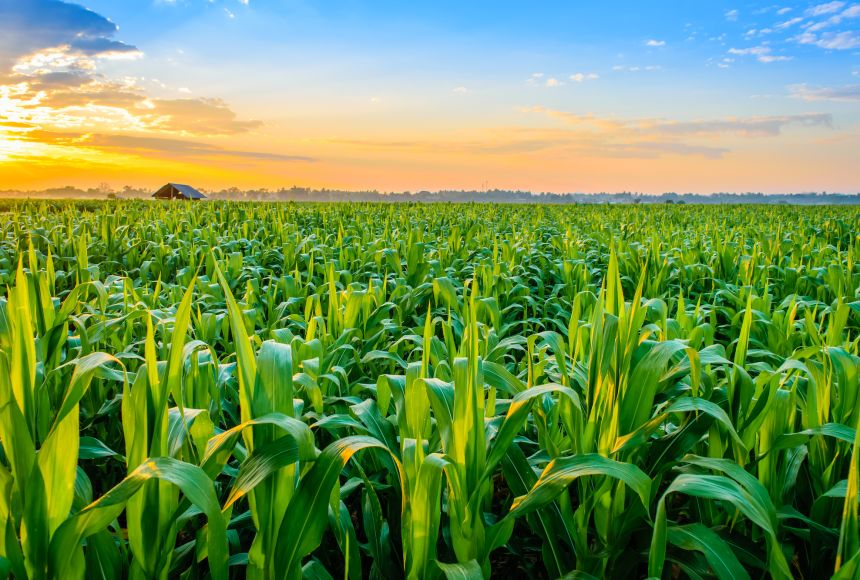

#Import Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#Mount to Drive - If using Colab otherwise skip step

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Data from csv file

In [3]:
# df=pd.read_csv(r"/content/drive/MyDrive/Data Analytics Projects/Crop_Production/Crop Production data.csv")
df = pd.read_csv(r"C:\Crop Production data.csv")

## Data Preparation and Cleaning

Data preparation, or data preprocessing, is a vital part of any data science project. It involves checking different variables to make sure the data is accurate. We also deal with missing data by either getting rid of it or filling it in with sensible values. Outliers, which are unusual data points, are also looked into to see if they should be included in the analysis.

By doing all this, we clean up the data so that it can be easily used in the project without causing any problems or biases.

In [4]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


**Dimensions of the dataset is 246091 rows and 7 columns**

In [5]:
df.shape

(246091, 7)

Out of seven variables, we have four categorical variables(State_Name,District_Name, Season and Crop type) and three continuous variables in float(Area and Production) and integer(Crop_Year) format.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


**Checking for Missing Data**

In [7]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
3730/246091

0.015156994770227274

Since there are only 3730 missing values out of a large dataset and no other variables have missing values, it makes sense to drop these samples. This missing data represents just 1.5% of the total sample size, so it shouldn't significantly impact our analysis.

In [9]:
df.dropna(subset=["Production"],axis=0,inplace=True)

In [10]:
df.shape

(242361, 7)

By dropping missing values in Production variable we ended up with 242361 sample size.

In [11]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

**Checking for Correlation between variables**

<Axes: >

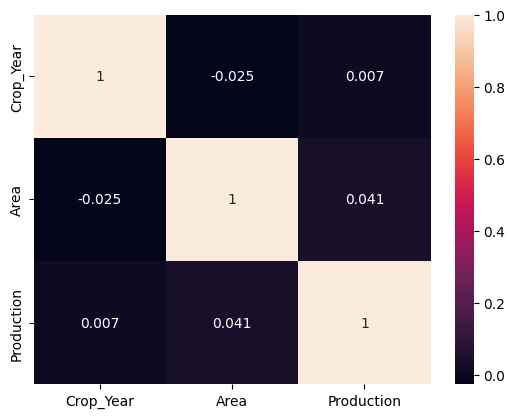

In [18]:
# Select only numerical columns
df_numerical = df.select_dtypes(include=[np.number])

# Calculate correlation and plot heatmap
plt.tick_params(labelsize=10)
sns.heatmap(df_numerical.corr(), annot=True)

* There is no variable showing high correlation with any other variable in the dataset.

## **Variable Analysis**

**State Variable**

In [19]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [20]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [21]:
df.State_Name.nunique()

33

This dataset encodes agriculture data for 33 Indian states (including Union Territory).
DataFrame.value_counts() helps to see the quantum of levels present. As seen below, we have more data from top agriculture rich states like Uttar Pradesh, Madhya Pradesh and Karnatake than other states.

In [22]:
df.State_Name.value_counts()

State_Name
Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                    

**District Variable**

In [23]:
df.District_Name.nunique()

646

* For 33 Indain states on further dissecting we get data for 646 different districts.

In [24]:
df.District_Name.unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [25]:
df.District_Name.value_counts()

District_Name
TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: count, Length: 646, dtype: int64

On District front, we have have more data coming from Tumkur, Belgaum, Hassan, Bellary and Bijapur from Karantaka state.

**Crop Year Variable**

Our Dataset has data for 19 years from 1997 to 2015. Top years are 2003, 2002, 2007-08 and 2006.

In [27]:
print(df.Crop_Year.nunique())
print(df.Crop_Year.min())
print(df.Crop_Year.max())
print(df.Crop_Year.value_counts())

19
1997
2015
Crop_Year
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: count, dtype: int64


**Season Variable**

Dataset talks of six different seasons i.e. Kharif, Annual, Autumn, Rabi, Summer and Winter crops with more crops yielding in Winter. Frequency wise, we have more datapoints from Kharif, Rabi and Annual crop types.

Little information about different crops types:
The kharif cropping season is from July –October during the south-west monsoon and the Rabi cropping season is from October-March (winter). The crops grown between March and June are summer crops. Crops in India are dependent on Monsoon water. There will be variation in crop production from one year to another.

In [28]:
print(df.Season.nunique())
print(df.Season.unique())
print(df.Season.max())
print(df.Season.value_counts())

6
['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']
Winter     
Season
Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: count, dtype: int64


Dataset shows data for 124 different crop varieties. On doing df.value_counts(), we can show top crops are Rice(15082),Maize(13787) and Moong(Green Gram, 10106).

In [29]:
print(df.Crop.nunique())
print(df.Crop.unique())
print(df.Crop.max())
print(df.Crop.value_counts().head(20))

124
['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Mesta' 'Cowpea(Lobia)' 'Lemon' 'Pome Granet'
 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total'
 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Sannhamp' 'Khesari' 'Guar seed' 'Mo

**Area Variable:** Area under cultivation

We have proption of area under cultibvation for different area. Production depends on the proption of area allocated for cultivation.

In [30]:
print(df.Area.nunique())
print(df.Area.max())
print(df.Area.value_counts().head(10))
print(df.Area.value_counts().tail(10))

38391
8580100.0
Area
1.0      3573
2.0      3140
100.0    2621
3.0      2478
4.0      2182
5.0      2090
6.0      1750
200.0    1671
10.0     1590
7.0      1555
Name: count, dtype: int64
Area
63107.0     1
13655.0     1
95399.0     1
71644.0     1
17459.0     1
25569.0     1
19349.0     1
90302.0     1
39698.0     1
279151.0    1
Name: count, dtype: int64


**Production Variable**


Production values range from 0 to 1250800000

In [31]:
df.Production.describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

In [32]:
df.Production.max()

1250800000.0

In [33]:
df.Production.value_counts(ascending = False)

Production
1.000000e+00    4028
0.000000e+00    3523
1.000000e+02    3521
2.000000e+00    2964
3.000000e+00    2311
                ... 
2.120000e+08       1
1.070000e+00       1
2.293410e+05       1
1.870600e+04       1
5.978990e+05       1
Name: count, Length: 51627, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


Looking at distribution of Area and Production variables. These two variables are highly skewed with lot of outliers.

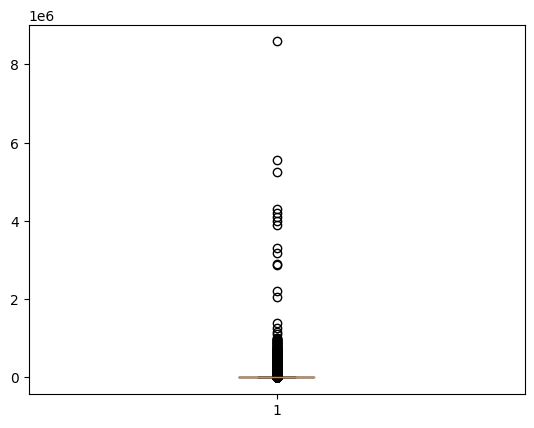

In [35]:
plt.boxplot(df.Area);

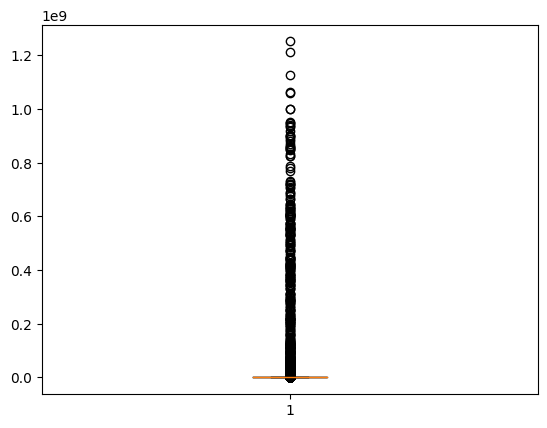

In [36]:
plt.boxplot(df.Production);

**Bivarate Analysis**

In [37]:
Prod = df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
Prod

,State_Name,Production
15,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
27,Tamil Nadu,1.207644e+10
30,Uttar Pradesh,3.234493e+09
3,Assam,2.111752e+09
32,West Bengal,1.397904e+09
17,Maharashtra,1.263641e+09
14,Karnataka,8.634298e+08
0,Andaman and Nicobar Islands,7.182232e+08
24,Punjab,5.863850e+08


* Kerala is top state when we look at the quantum of Production for last 19.years.

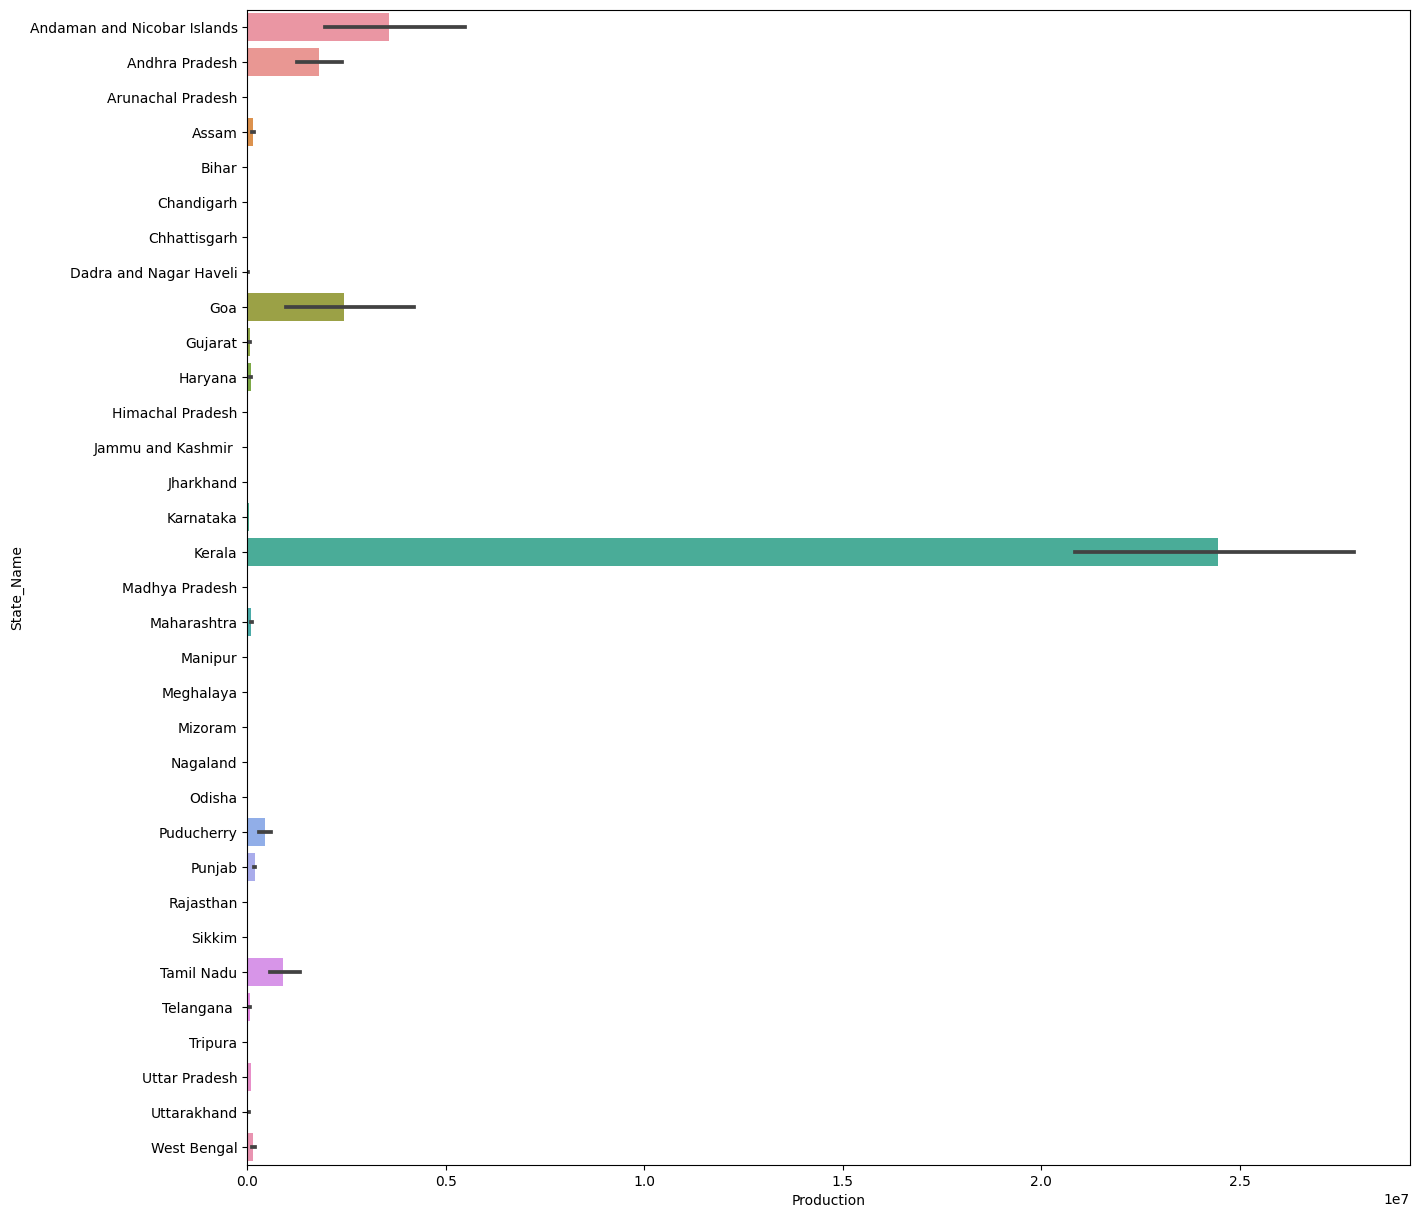

In [38]:
plt.figure(figsize= (15,15))
sns.barplot(x=df['Production'],y= df["State_Name"], orient='h');

## Exploratory Analysis and Visualization

Dataset has been preprocessed for next step that's Exploring all the variables and their levels(for categorical variables) for extracting important insights which defines the Indian cultivation and how its progressing in future.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [39]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [40]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [41]:
df.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


(array([2.32912e+05, 6.29400e+03, 2.07700e+03, 5.97000e+02, 2.53000e+02,
        1.14000e+02, 3.30000e+01, 2.00000e+01, 1.90000e+01, 9.00000e+00,
        8.00000e+00, 7.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

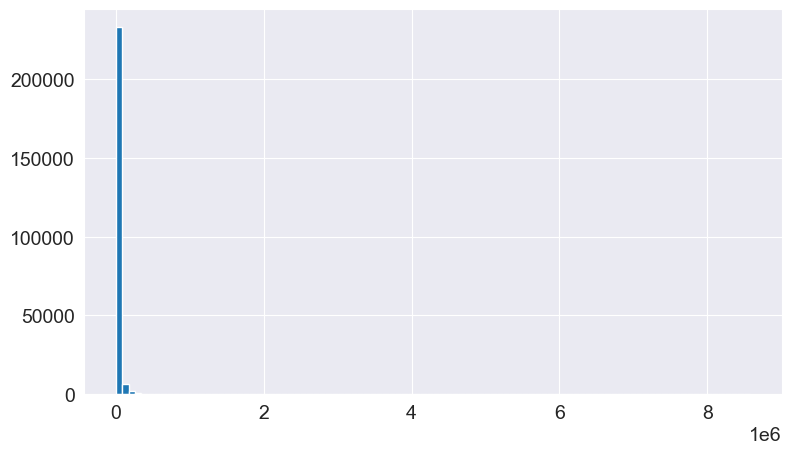

In [51]:
plt.hist(df.Area, bins = 100)

(array([2.42168e+05, 9.00000e+01, 6.90000e+01, 2.80000e+01, 6.00000e+00]),
 array([0.00000e+00, 2.50160e+08, 5.00320e+08, 7.50480e+08, 1.00064e+09,
        1.25080e+09]),
 <BarContainer object of 5 artists>)

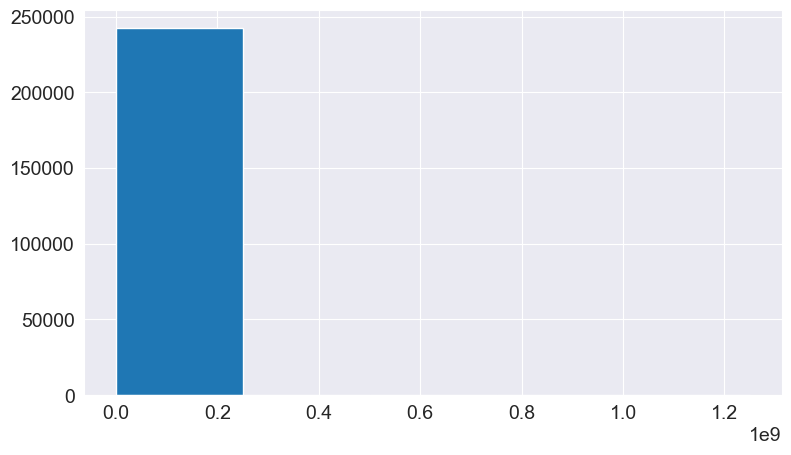

In [57]:
plt.hist(df.Production, bins =5)

Continuous variables Area and Production is highly skewed with lot of outliers.

# New Variables

Looking at the seven variables, we could extract more information if new variable could be created using present variables. Some of the possibilities are:
* Different zones (Union Terr, South Zone, NE Zone, East Zone, North Zone, Central Zone and West Zone)
* Different caterories (Cereal, Pulses,Fruits,Beans,Vegetables, Spices, fibres, Nuts, Natural Polymer,Coffee, Tea, Total foodgrain, Pulses, Oilseeds, Paddy, Commercial, Sugarcane, forage plants and Others)

In [58]:
#Zone-Wise Production - 1997-2014
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

df.strip() helps to Remove spaces at the beginning and at the end of the string.

In [59]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

df['Zones'] = df.apply(get_zonal_names, axis=1)
df['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

Using Zonal information, we can decipher the top zones are South India, North India and East India.

In [60]:
df.Zones.value_counts()

Zones
South Zone      53500
North Zone      49874
East Zone       43261
West Zone       33134
Central Zone    32972
NE Zone         28284
Union Terr       1336
Name: count, dtype: int64

In [61]:
crop=df['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

df['cat_crop']=df['Crop'].apply(cat_crop)

Looking at the new variable cat_crop, top frequency of crop types are Cereal, Pulses and oilseeds.

In [62]:
df["cat_crop"].value_counts()

cat_crop
Cereal        63283
Pulses        40898
oilseeds      33801
Vegetables    23154
spices        21638
Nuts          11472
Commercial    10561
fibres         9785
Beans          9115
Fruits         6153
Name: count, dtype: int64

In [63]:
data_explore = df.copy()

## **Visualization on Important variables**:

# a. Zonal distribution of crops:



* Production wise top zone is South India

Text(0.5, 1.0, 'Zone-Wise Production: Total')

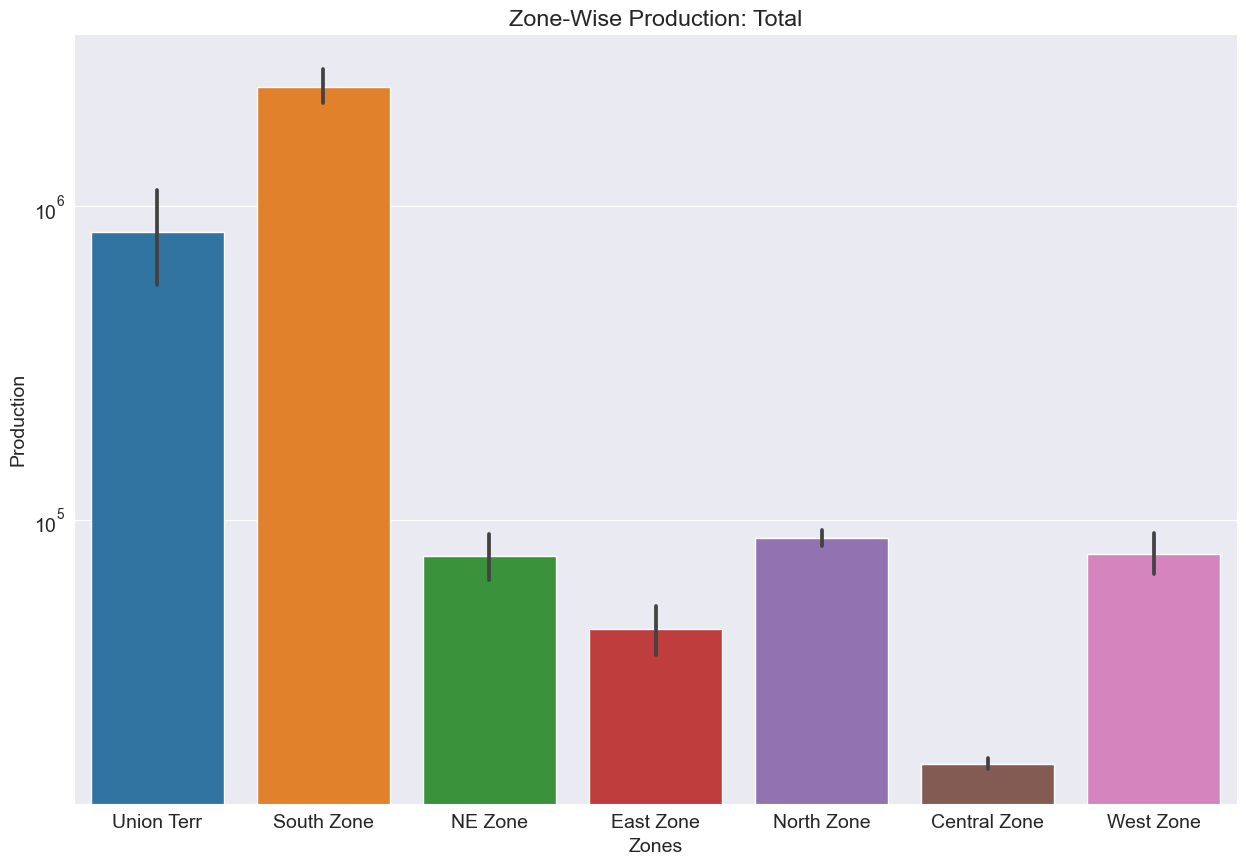

In [64]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=data_explore, x='Zones', y='Production')
plt.yscale('log')
plt.title('Zone-Wise Production: Total')

Let's find out in South India, which state dominates when compared with Production values.

Text(0.5, 1.0, 'Southern-Zone Production')

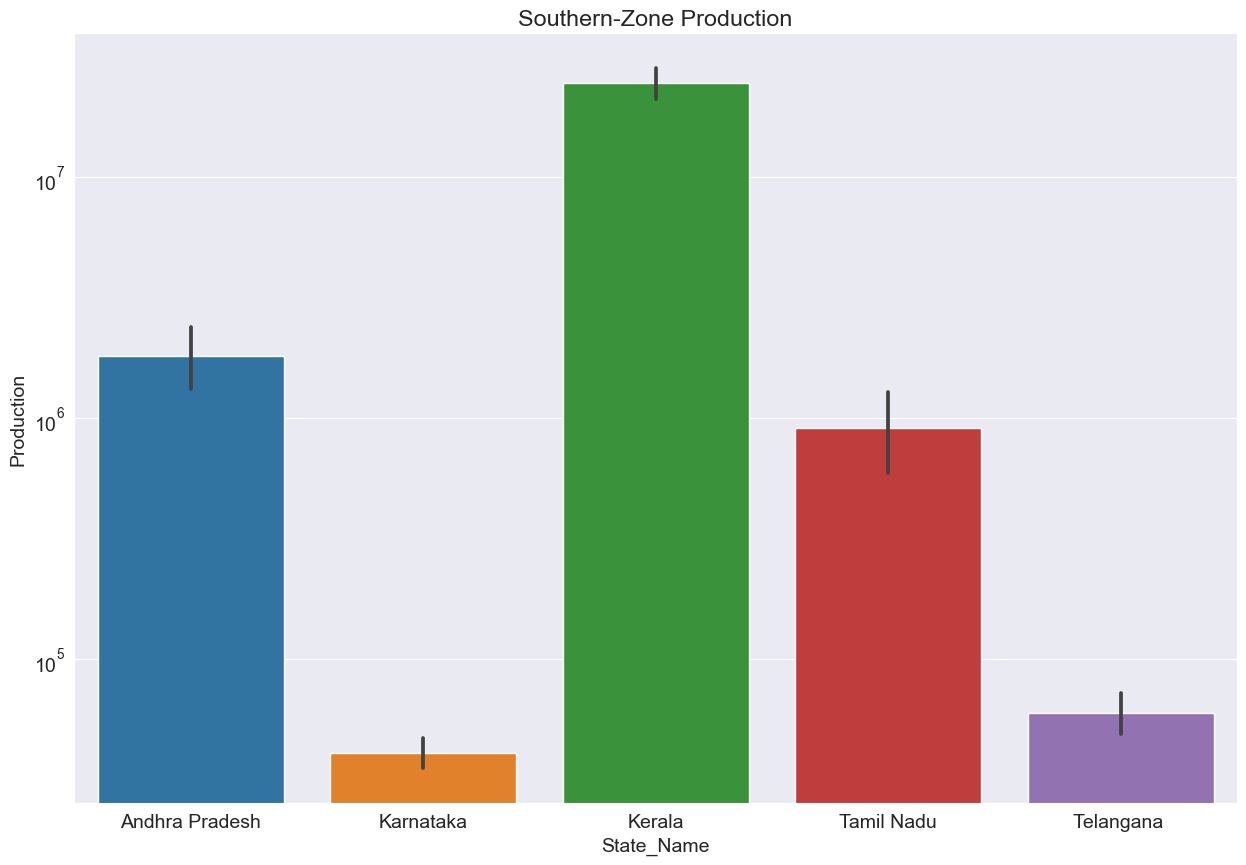

In [65]:
south_zone =  data_explore[(data_explore["Zones"] == 'South Zone')]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=south_zone, x='State_Name', y='Production')
plt.yscale('log')
plt.title('Southern-Zone Production')

*Top South Indian states are Kerala, Andhra Pradesh and Tamil Nadu.

# b. Crop wise Production status:

Top Crops Production wise are: Coconut, Sugarcane and Rice.

Text(0.5, 1.0, 'Overall Crops vs Production')

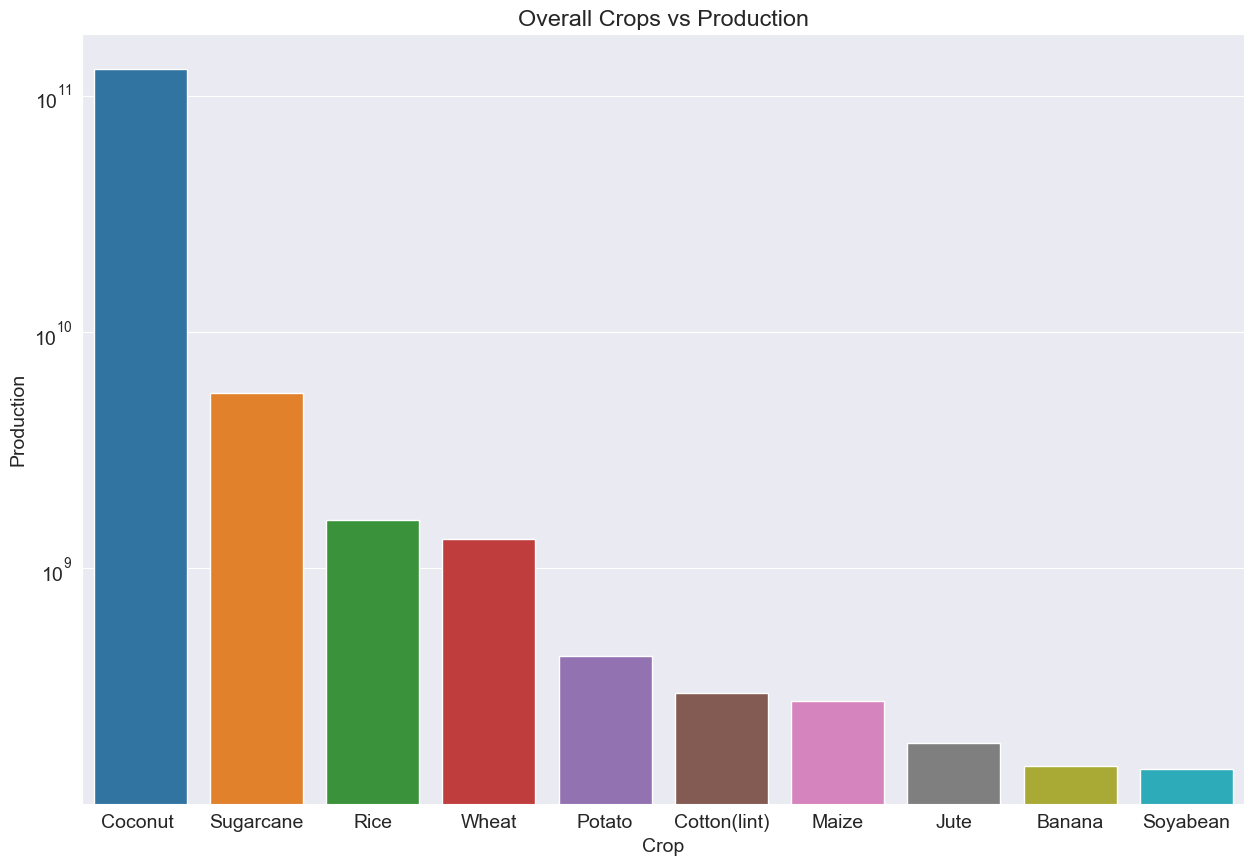

In [72]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=crop, x='Crop', y='Production')
plt.yscale('log')
plt.title('Overall Crops vs Production')

In [73]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Zones', 'cat_crop'],
      dtype='object')

# c. Yearwise Production Status:

Top production years are 2011, 2013 and 2014.

<Axes: xlabel='Crop_Year'>

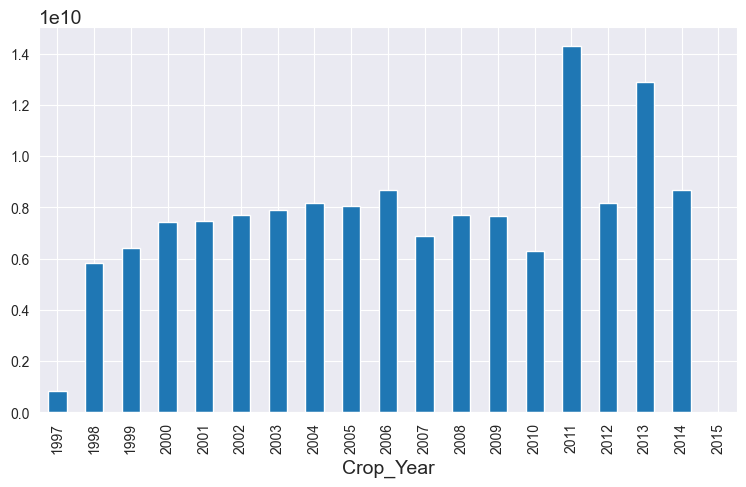

In [74]:
plt.tick_params(labelsize=10)
data_explore.groupby("Crop_Year")["Production"].agg("sum").plot.bar()

# d. Season wise Production Status:

Top crop categories which shows high production values are Whole Year(Annual growing plants),Kharif  and Rabi crops. It clearly shows these crops heavily dependent on seasonal monssons.

Text(0.5, 1.0, 'Seasonal Crops vs Production')

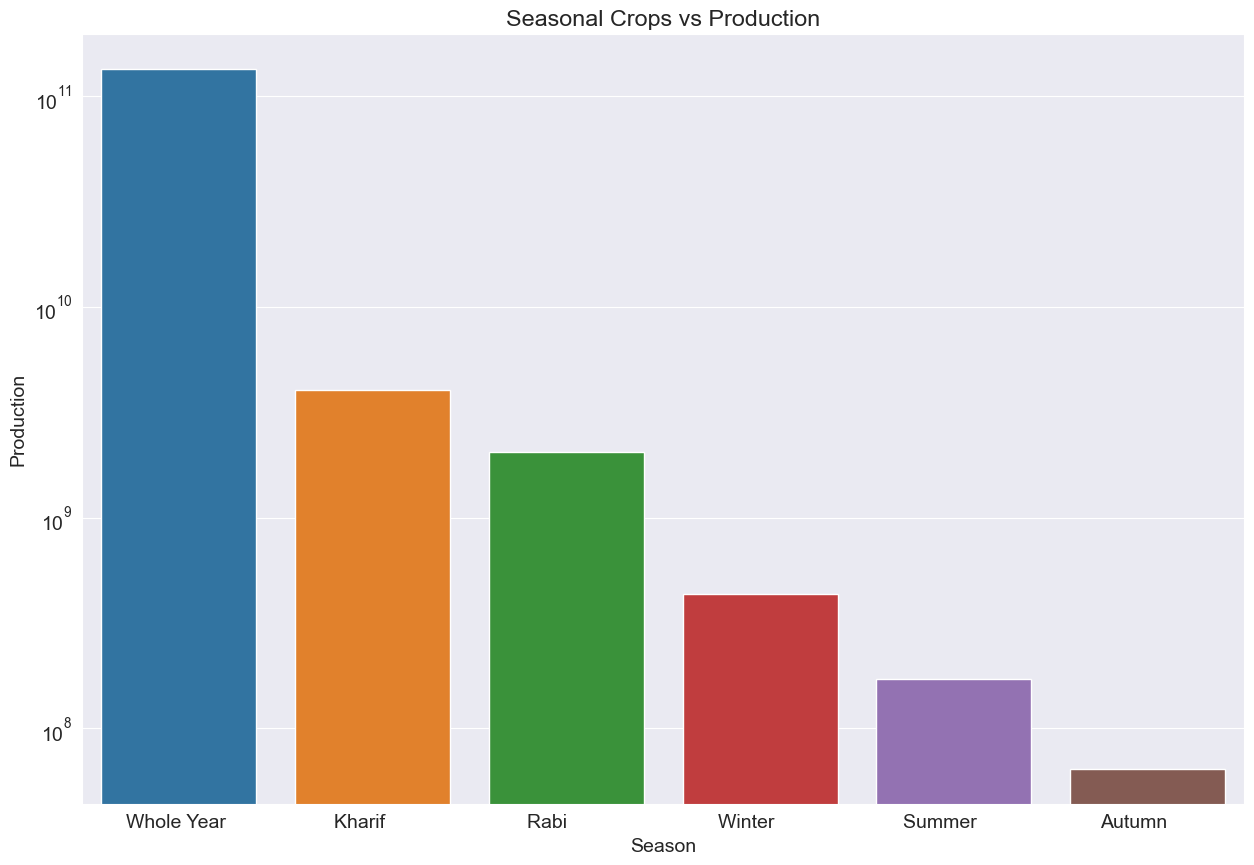

In [78]:
#Season vs Production
df_season=data_explore.copy()
season = df_season.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=season, x='Season', y='Production')
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

# e. Crop wise Production plot describing production values for all crop types.


Top crop categories are Cereal, Pulses and Oilseeds.

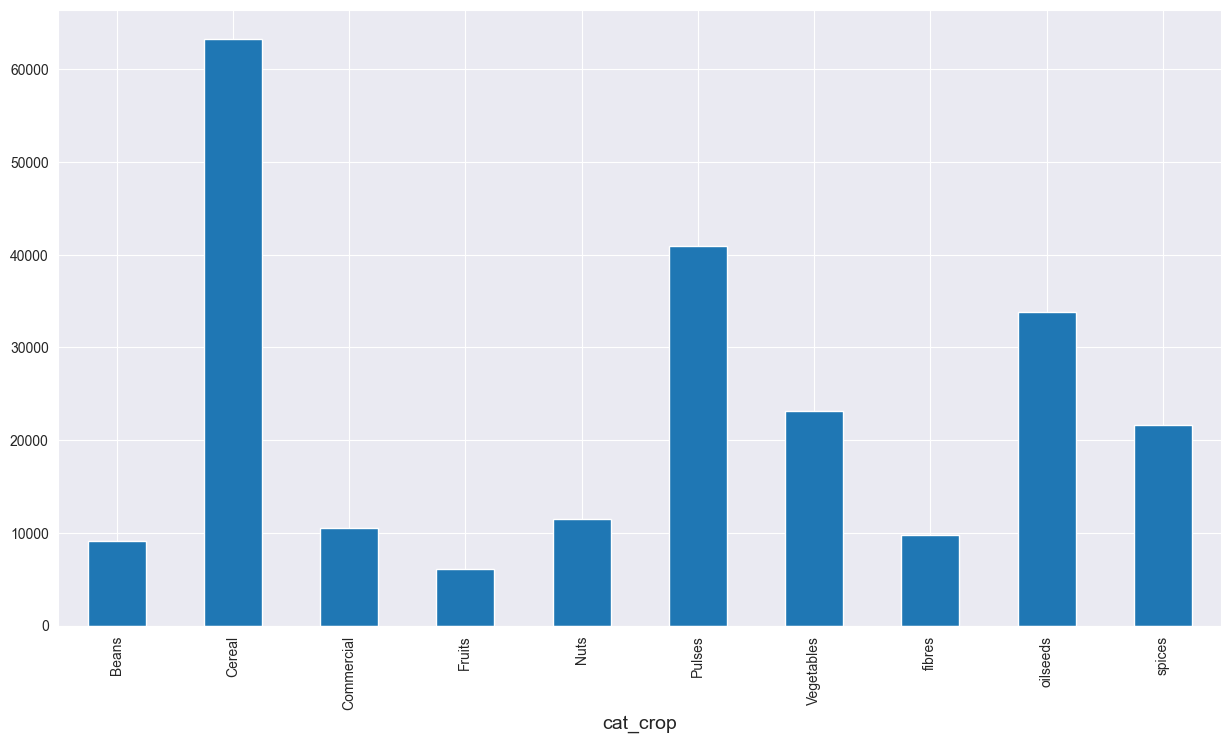

In [79]:
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
data_explore.groupby("cat_crop")["Production"].agg("count").plot.bar()
plt.show()

# f. State versus Crop Category versus Season plot:

Interesting facts:
* South zone:
i. Top producing state Kerela shows a abundance of whole year seasonal crops
* North Zone:
ii. Top producing state Uttar Pradesh shows abundance of Kharif, Rabi and Summar crops

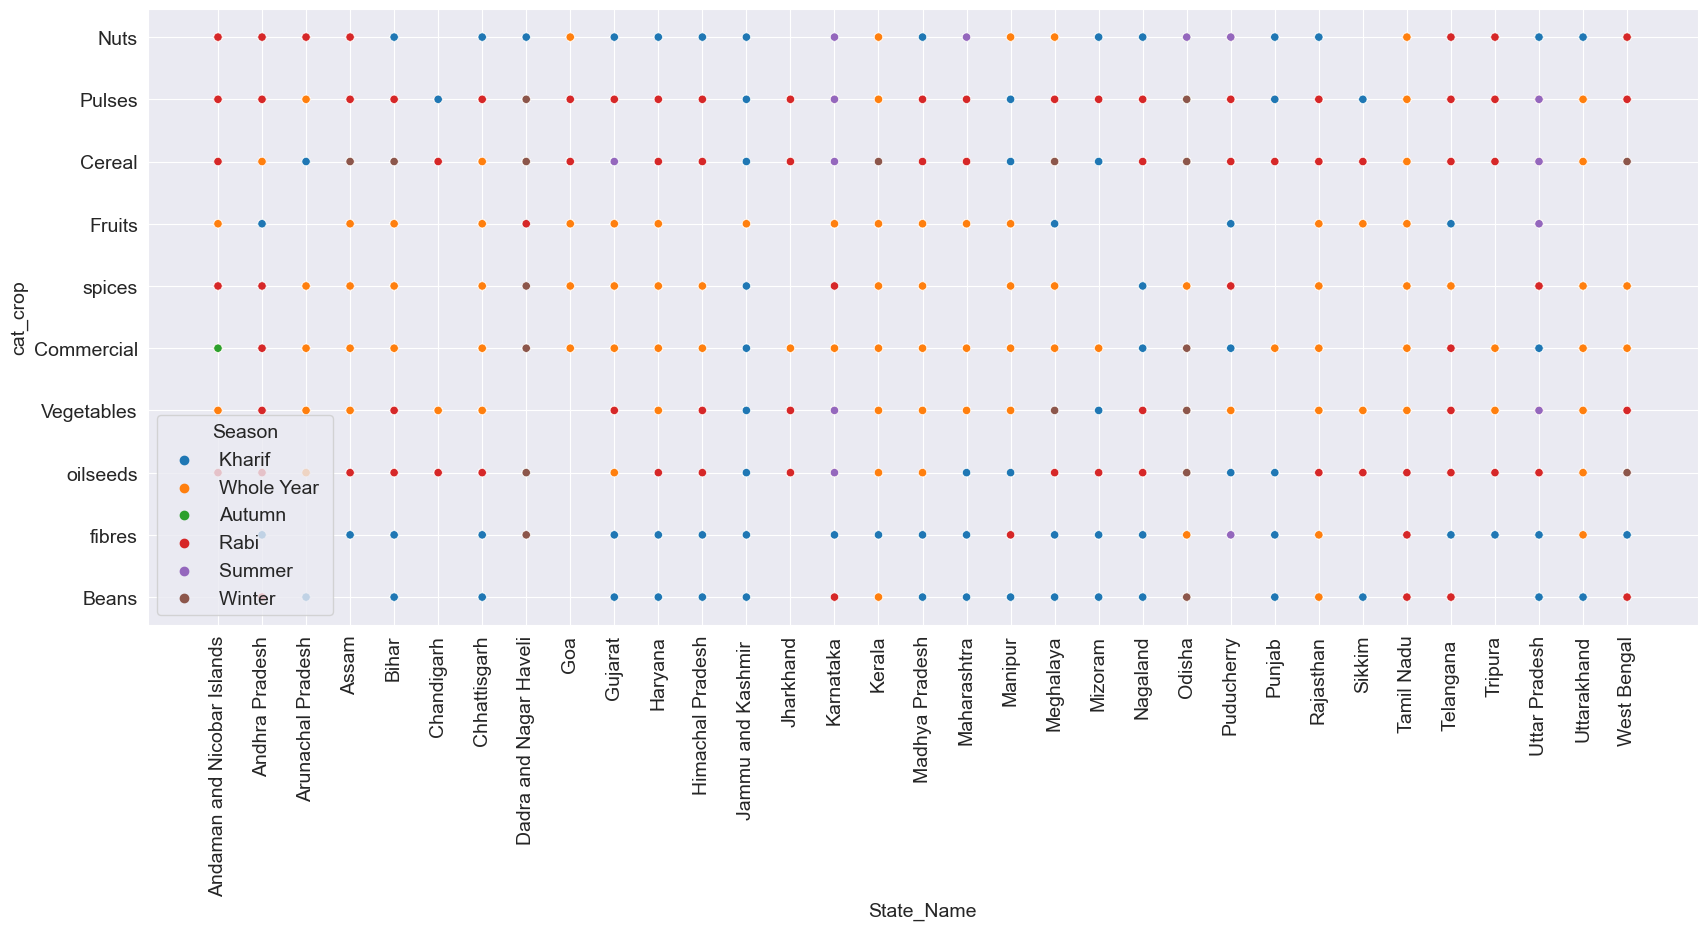

In [80]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=data_explore,x="State_Name",y="cat_crop",hue="Season")
plt.xticks(rotation=90)
plt.show()

# g. Different proportion of Crop Categories for India:

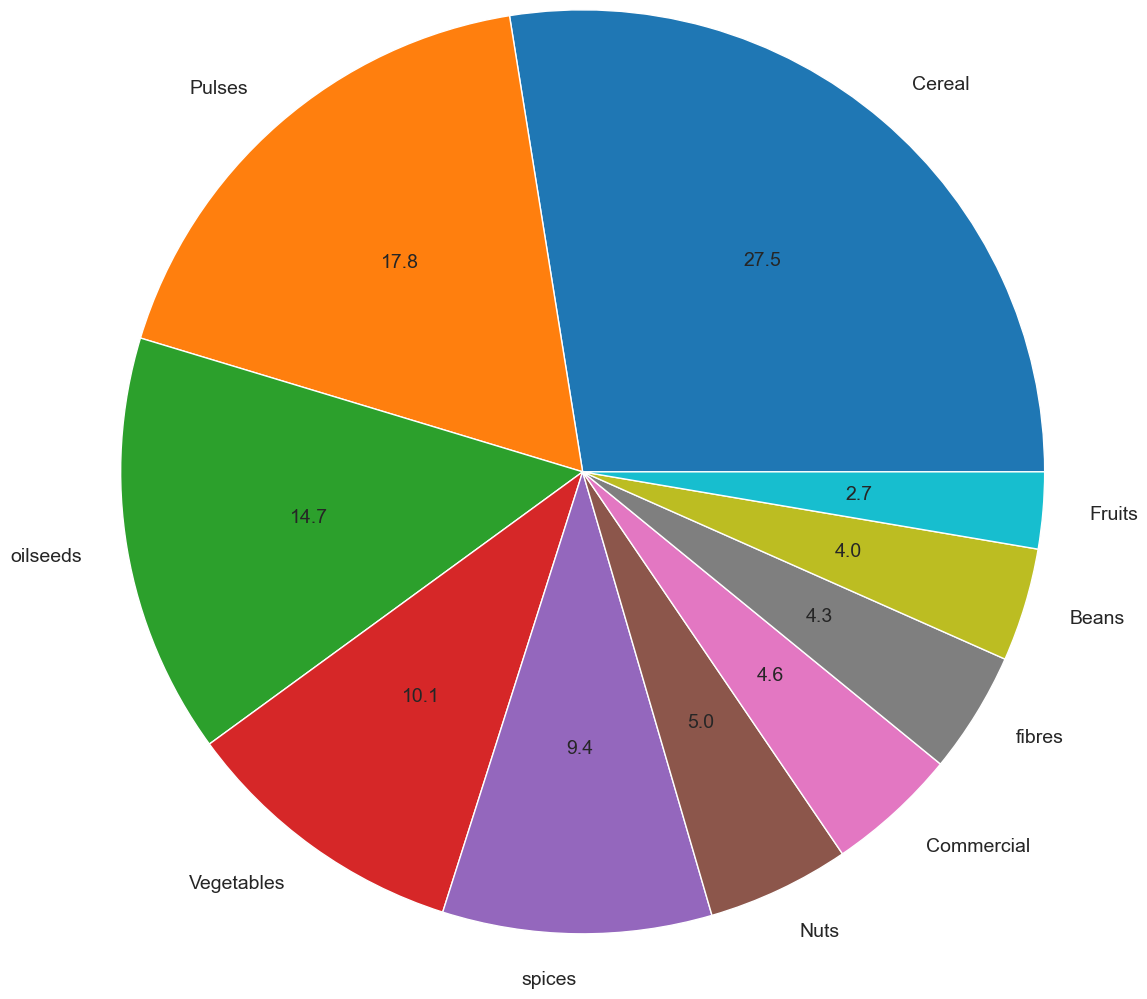

In [81]:
df1=data_explore["cat_crop"].value_counts()
df1.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

## Asking and Answering Questions

We have drawn few inferences at data exploration stage and visualizing some important broad features of the dataset.

Let's ask few crucial question and see what data speaks out:



**#### Q1: Which State dominates in crop production with different categories of crops?**

**Strategy:**

Step 1: Making a crosstable using State Name and Crop categories

Step 2: Visualizing crosstable data in the form of stacked bar plot.


In [82]:
df_2 = pd.crosstab(data_explore['State_Name'], data_explore['cat_crop'])
df_2

cat_crop,Beans,Cereal,Commercial,Fruits,Nuts,Pulses,Vegetables,fibres,oilseeds,spices
State_Name,,,,,,,,,,
Andaman and Nicobar Islands,0,20,15,16,37,9,20,0,11,52
Andhra Pradesh,386,2264,474,502,674,1336,1046,333,1101,802
Arunachal Pradesh,26,1021,168,0,26,67,257,0,343,637
Assam,0,2952,854,920,400,2234,1781,1284,2097,1338
Bihar,280,6108,756,226,130,3731,1775,924,2504,1396
Chandigarh,0,39,0,0,0,14,26,0,7,0
Chhattisgarh,646,1805,316,264,261,2087,1143,535,1496,1288
Dadra and Nagar Haveli,0,116,12,9,9,64,0,13,30,1
Goa,0,62,22,16,47,32,0,0,0,12


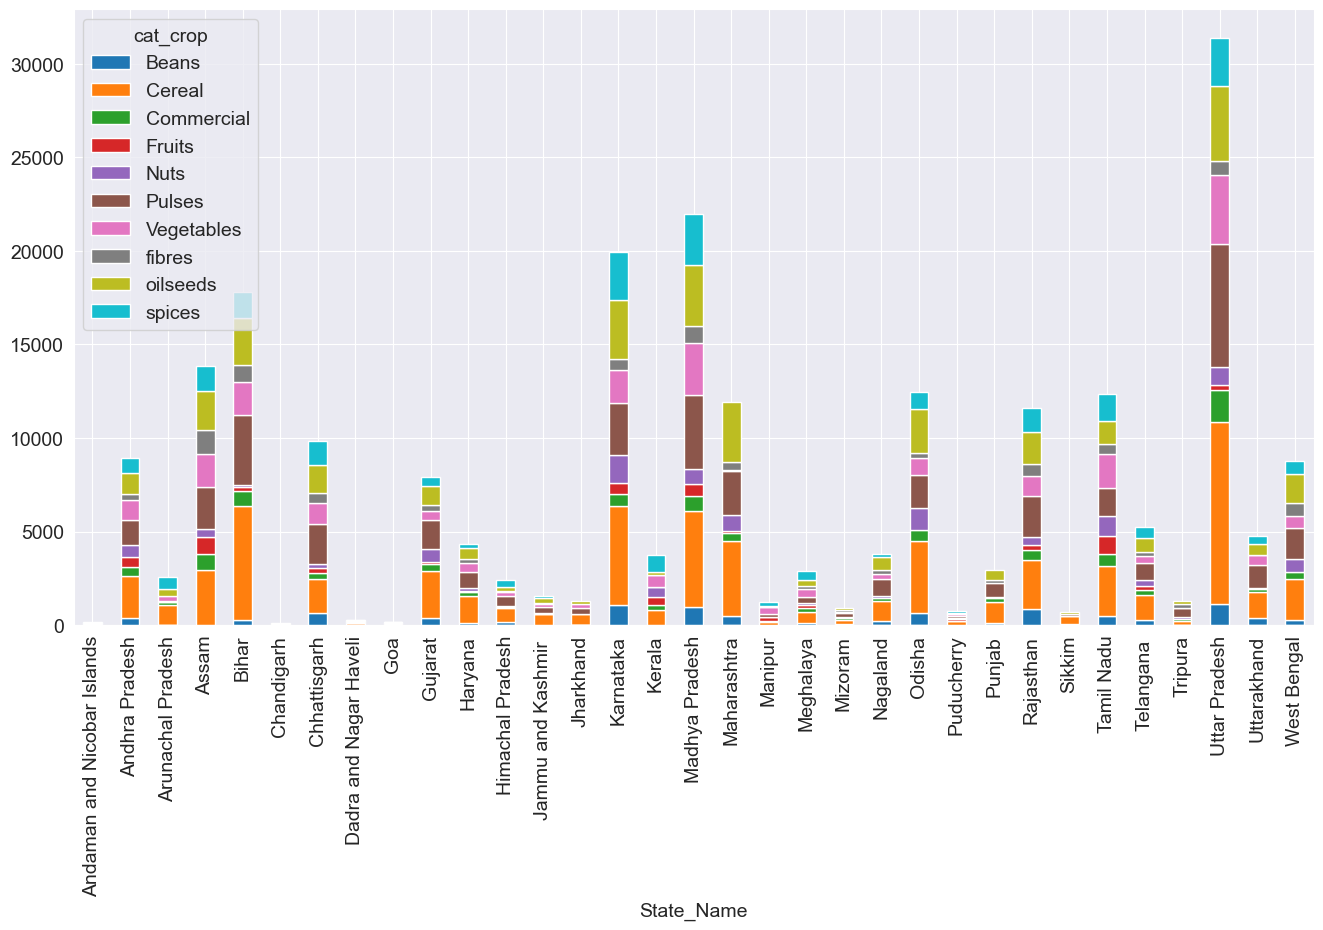

In [83]:
df_2.plot(kind='bar', stacked=True, figsize = (16,8));

# Answer:

**Uttar Pradesh** is topping in producing more crop categories than any other Indian state.

**#### Q2: Which Crop is seen in high frequency and when and where is it grown in India?**

**Strategy:**

Step 1: value.count() on Crop variable to find the high frequency crop in the dataset.

Step 2: Making a  season of data only for that crop

Step 3: Finding out the season when it is grown heavily

Step 4: Finding out which state predominately produces it

Step 5: Finding out which District produces this crop highly

Step 6: Finding out which year the production figures are high

Step 7: Finding out Area versus Production relationship for this crop production

In [84]:
data_explore["Crop"].value_counts()[:5]

Crop
Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: count, dtype: int64

In [85]:
rice_df = data_explore[data_explore["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(15082, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00,Union Terr,Cereal
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00,Union Terr,Cereal
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84,Union Terr,Cereal


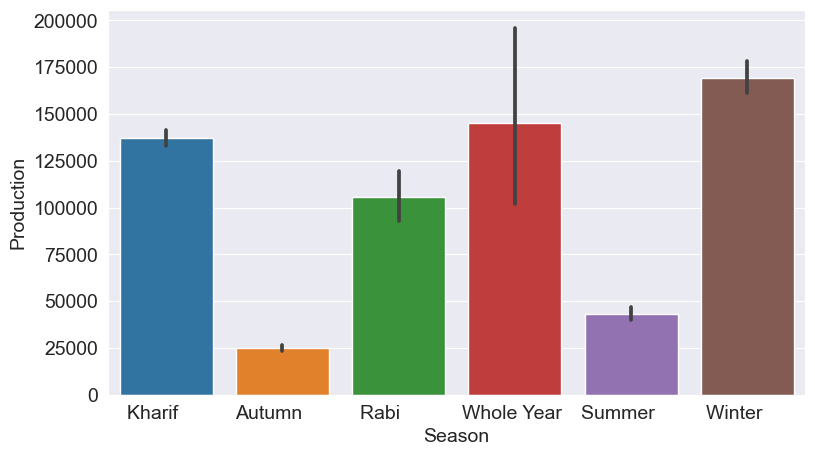

In [86]:
sns.barplot(data=rice_df, x="Season", y="Production");


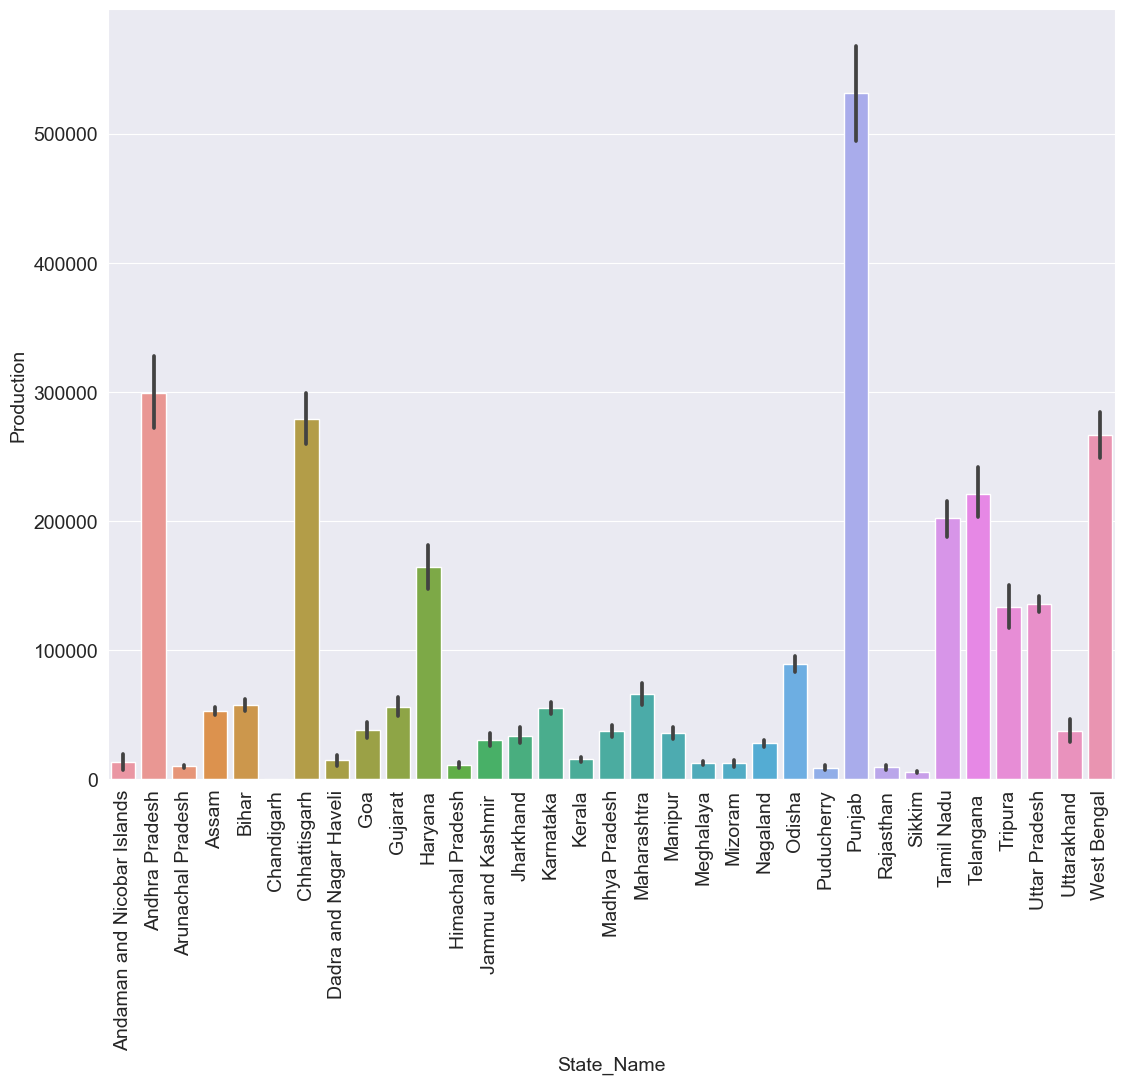

In [94]:
plt.figure(figsize=(13,10))
sns.barplot(x="State_Name", y="Production", data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [95]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:10]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:10]

,District_Name,Production,precent_of_pro
58,BARDHAMAN,34239976.0,2.132707
374,MEDINIPUR WEST,29192719.0,1.818328
612,WEST GODAVARI,27845309.0,1.734402
169,EAST GODAVARI,24690929.0,1.537925
494,SANGRUR,24448000.0,1.522794
325,KRISHNA,20280606.0,1.263219
90,BIRBHUM,19753571.0,1.230391
347,LUDHIANA,18950000.0,1.180339
386,MURSHIDABAD,18403217.0,1.146282
214,GUNTUR,18245831.0,1.136479


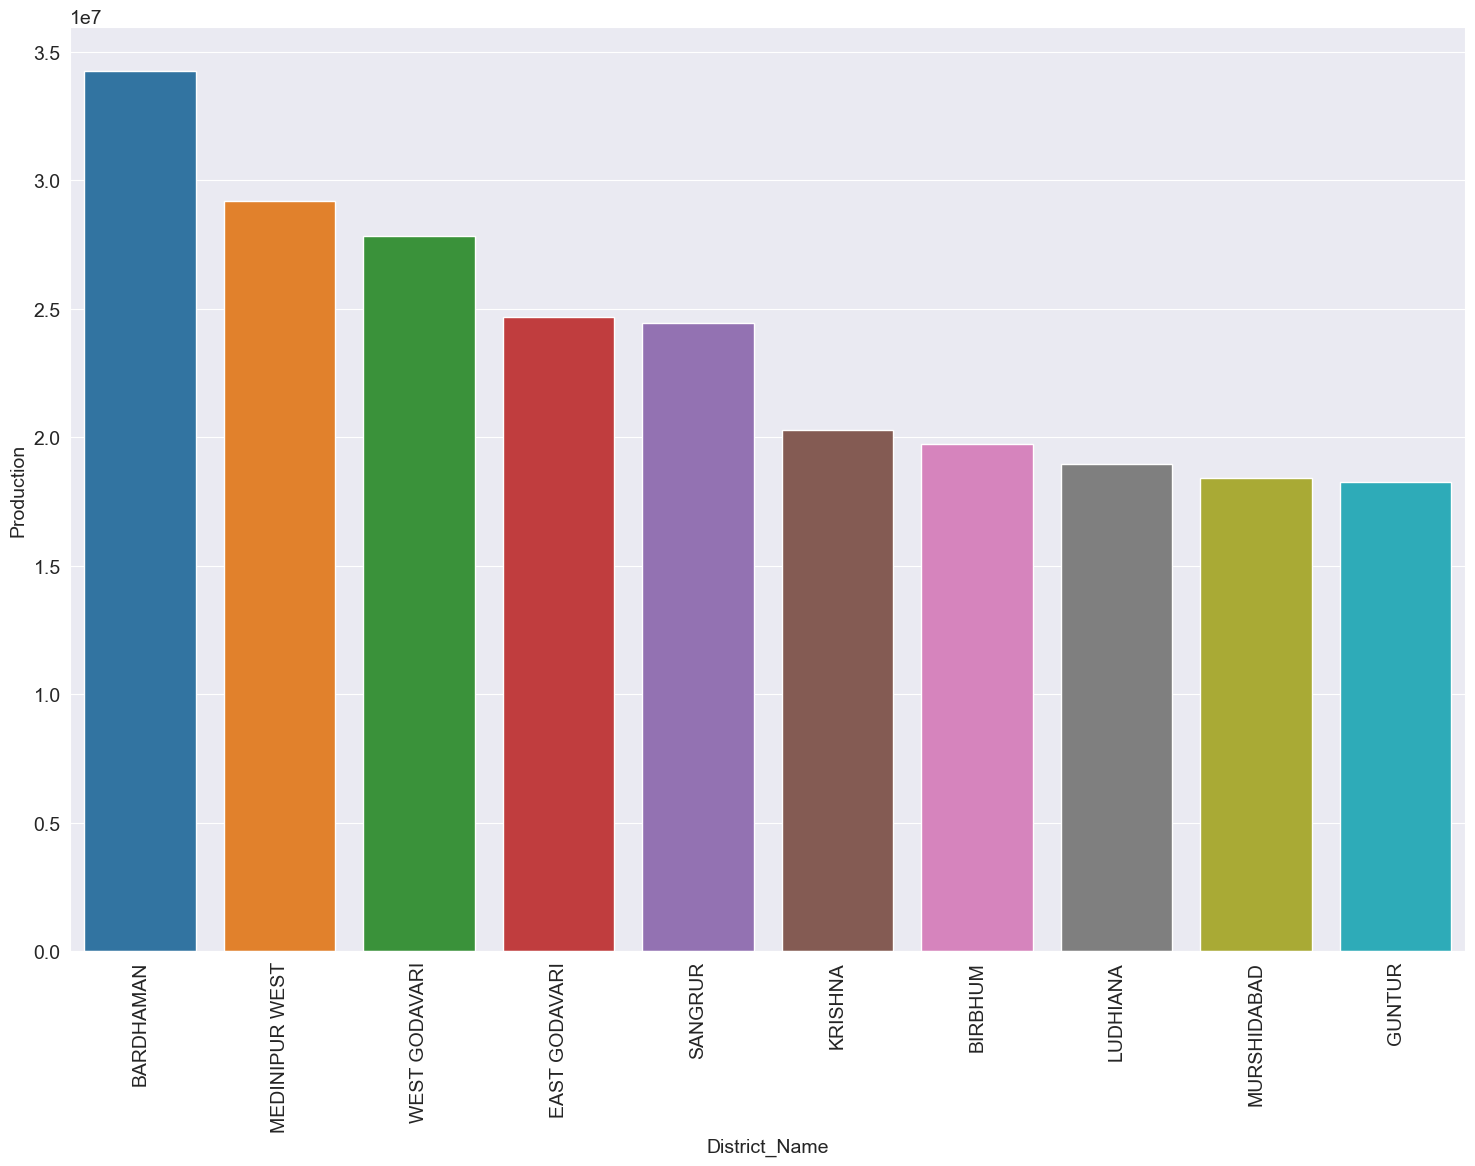

In [96]:
plt.figure(figsize=(18,12))
sns.barplot(x="District_Name", y="Production", data=top_rice_pro_dis[:10])
plt.xticks(rotation=90)
plt.show()

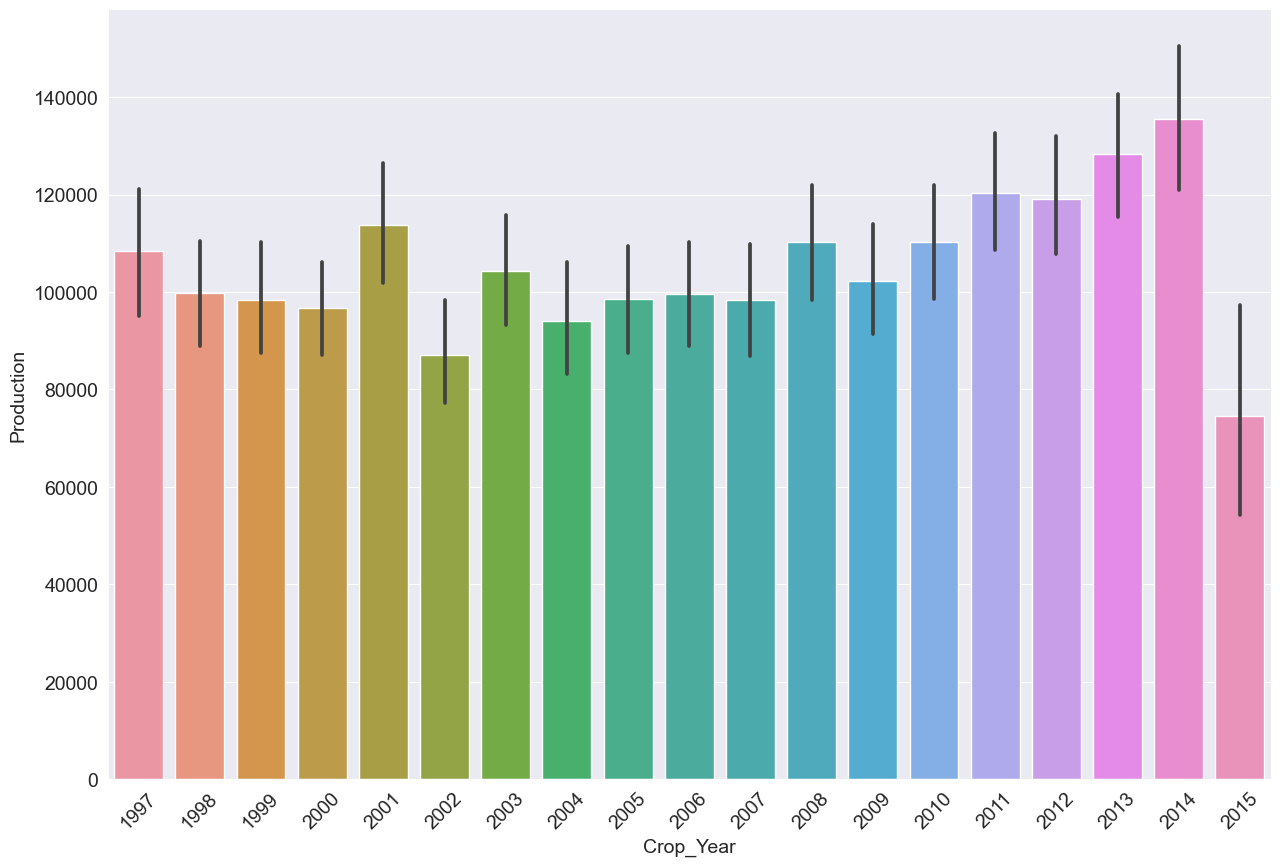

In [97]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year", y="Production", data=rice_df)
plt.xticks(rotation=45)
plt.show()

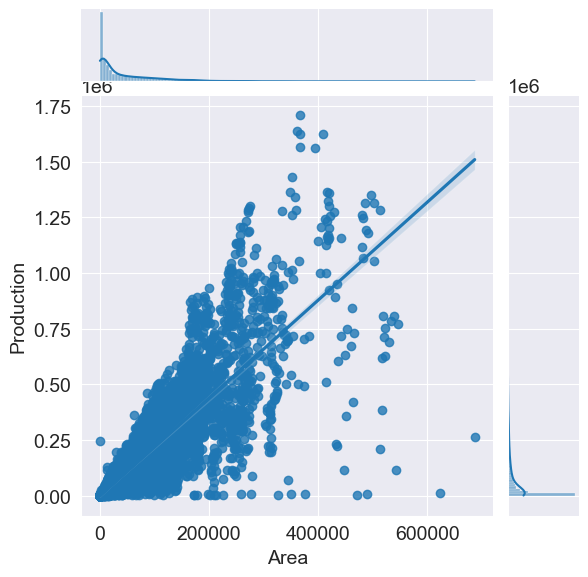

In [98]:
sns.jointplot(x="Area", y="Production", data=rice_df, kind="reg")


**Answers:**

1. Rice is grown heavily when we look the frequency of crops in India

2. Rice needs Winter for it mature

3. Statewise Punjab dominates in rice production

4. District wise its BARDHAMAN(2.13%), MEDINIPUR WEST(1.8%) and WEST GODAVARI(1.73%) which contributes to total rice production.

5. Yearwise 2014 is the year when production reached the peak production

6. Correlation between Area and Production shows high production is directly proportional to Area under cultivation.

**#### Q3: Which states ranks high in area wise crop production in India? Substantiate with facts and Figures?**

**Strategy:**

Step 1: Find the state where Area under crop production is high and get top 10 states

Step 2: Make a subset of the data with the above conditional data

Step 3: Look the cultivation status of these states yearwise

,State_Name,Area
30,Uttar Pradesh,4.336223e+08
16,Madhya Pradesh,3.297913e+08
17,Maharashtra,3.221860e+08
25,Rajasthan,2.687882e+08
32,West Bengal,2.154030e+08
14,Karnataka,2.029086e+08
9,Gujarat,1.549261e+08
1,Andhra Pradesh,1.315073e+08
4,Bihar,1.282695e+08
24,Punjab,1.267152e+08


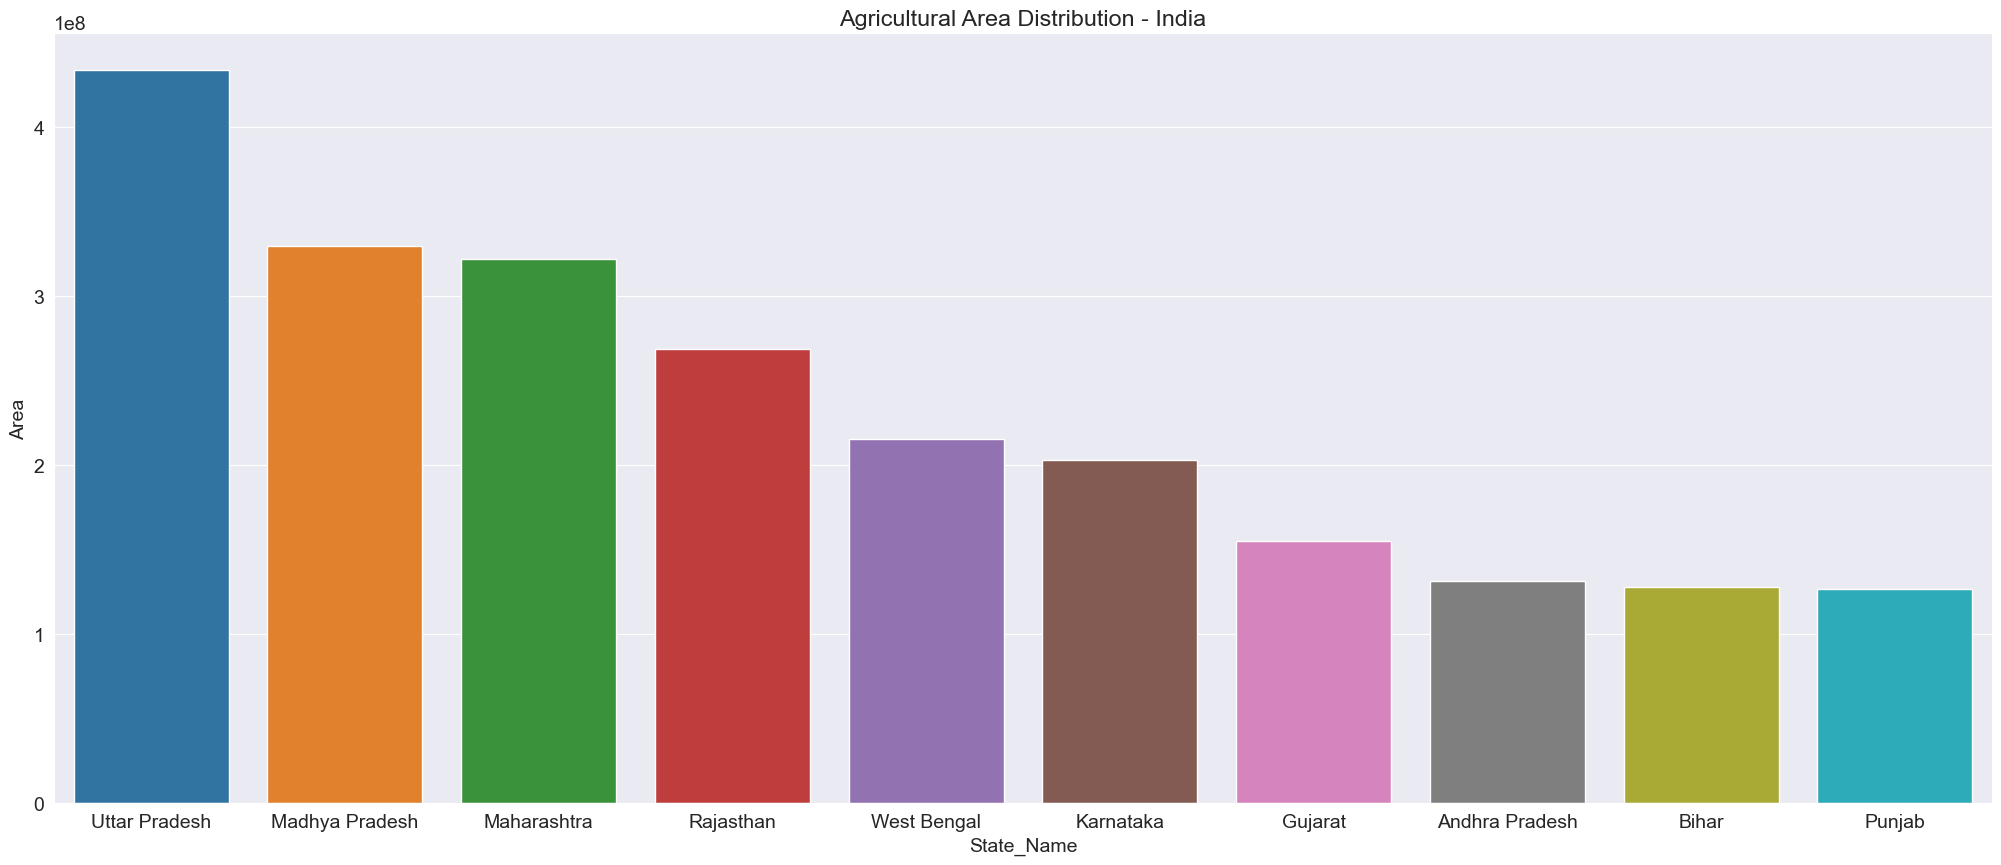

In [101]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x=df.State_Name.head(10), y=df.Area.head(10), errwidth=0)
plt.title('Agricultural Area Distribution - India')
df.head(10)

C:\Users\vinay\AppData\Local\Temp\ipykernel_26564\272447579.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(df.State_Name.unique()),1,count)
C:\Users\vinay\AppData\Local\Temp\ipykernel_26564\272447579.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=data_explore[data_explore.State_Name==state]['Crop_Year'], y=data_explore[data_explore.State_Name==state]['Production'], ci=None)
C:\Users\vinay\AppData\Local\Temp\ipykernel_26564\272447579.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=data_explore[data_explore.State_Name==state]['Crop_Year'], y=data_explore[data_explore.State_Name==state]['Production'], ci=None)
C:\Users\vinay\AppData\Local\Temp\ipykernel_26564\272447579.py:9: FutureWarning: 

The `ci` paramet

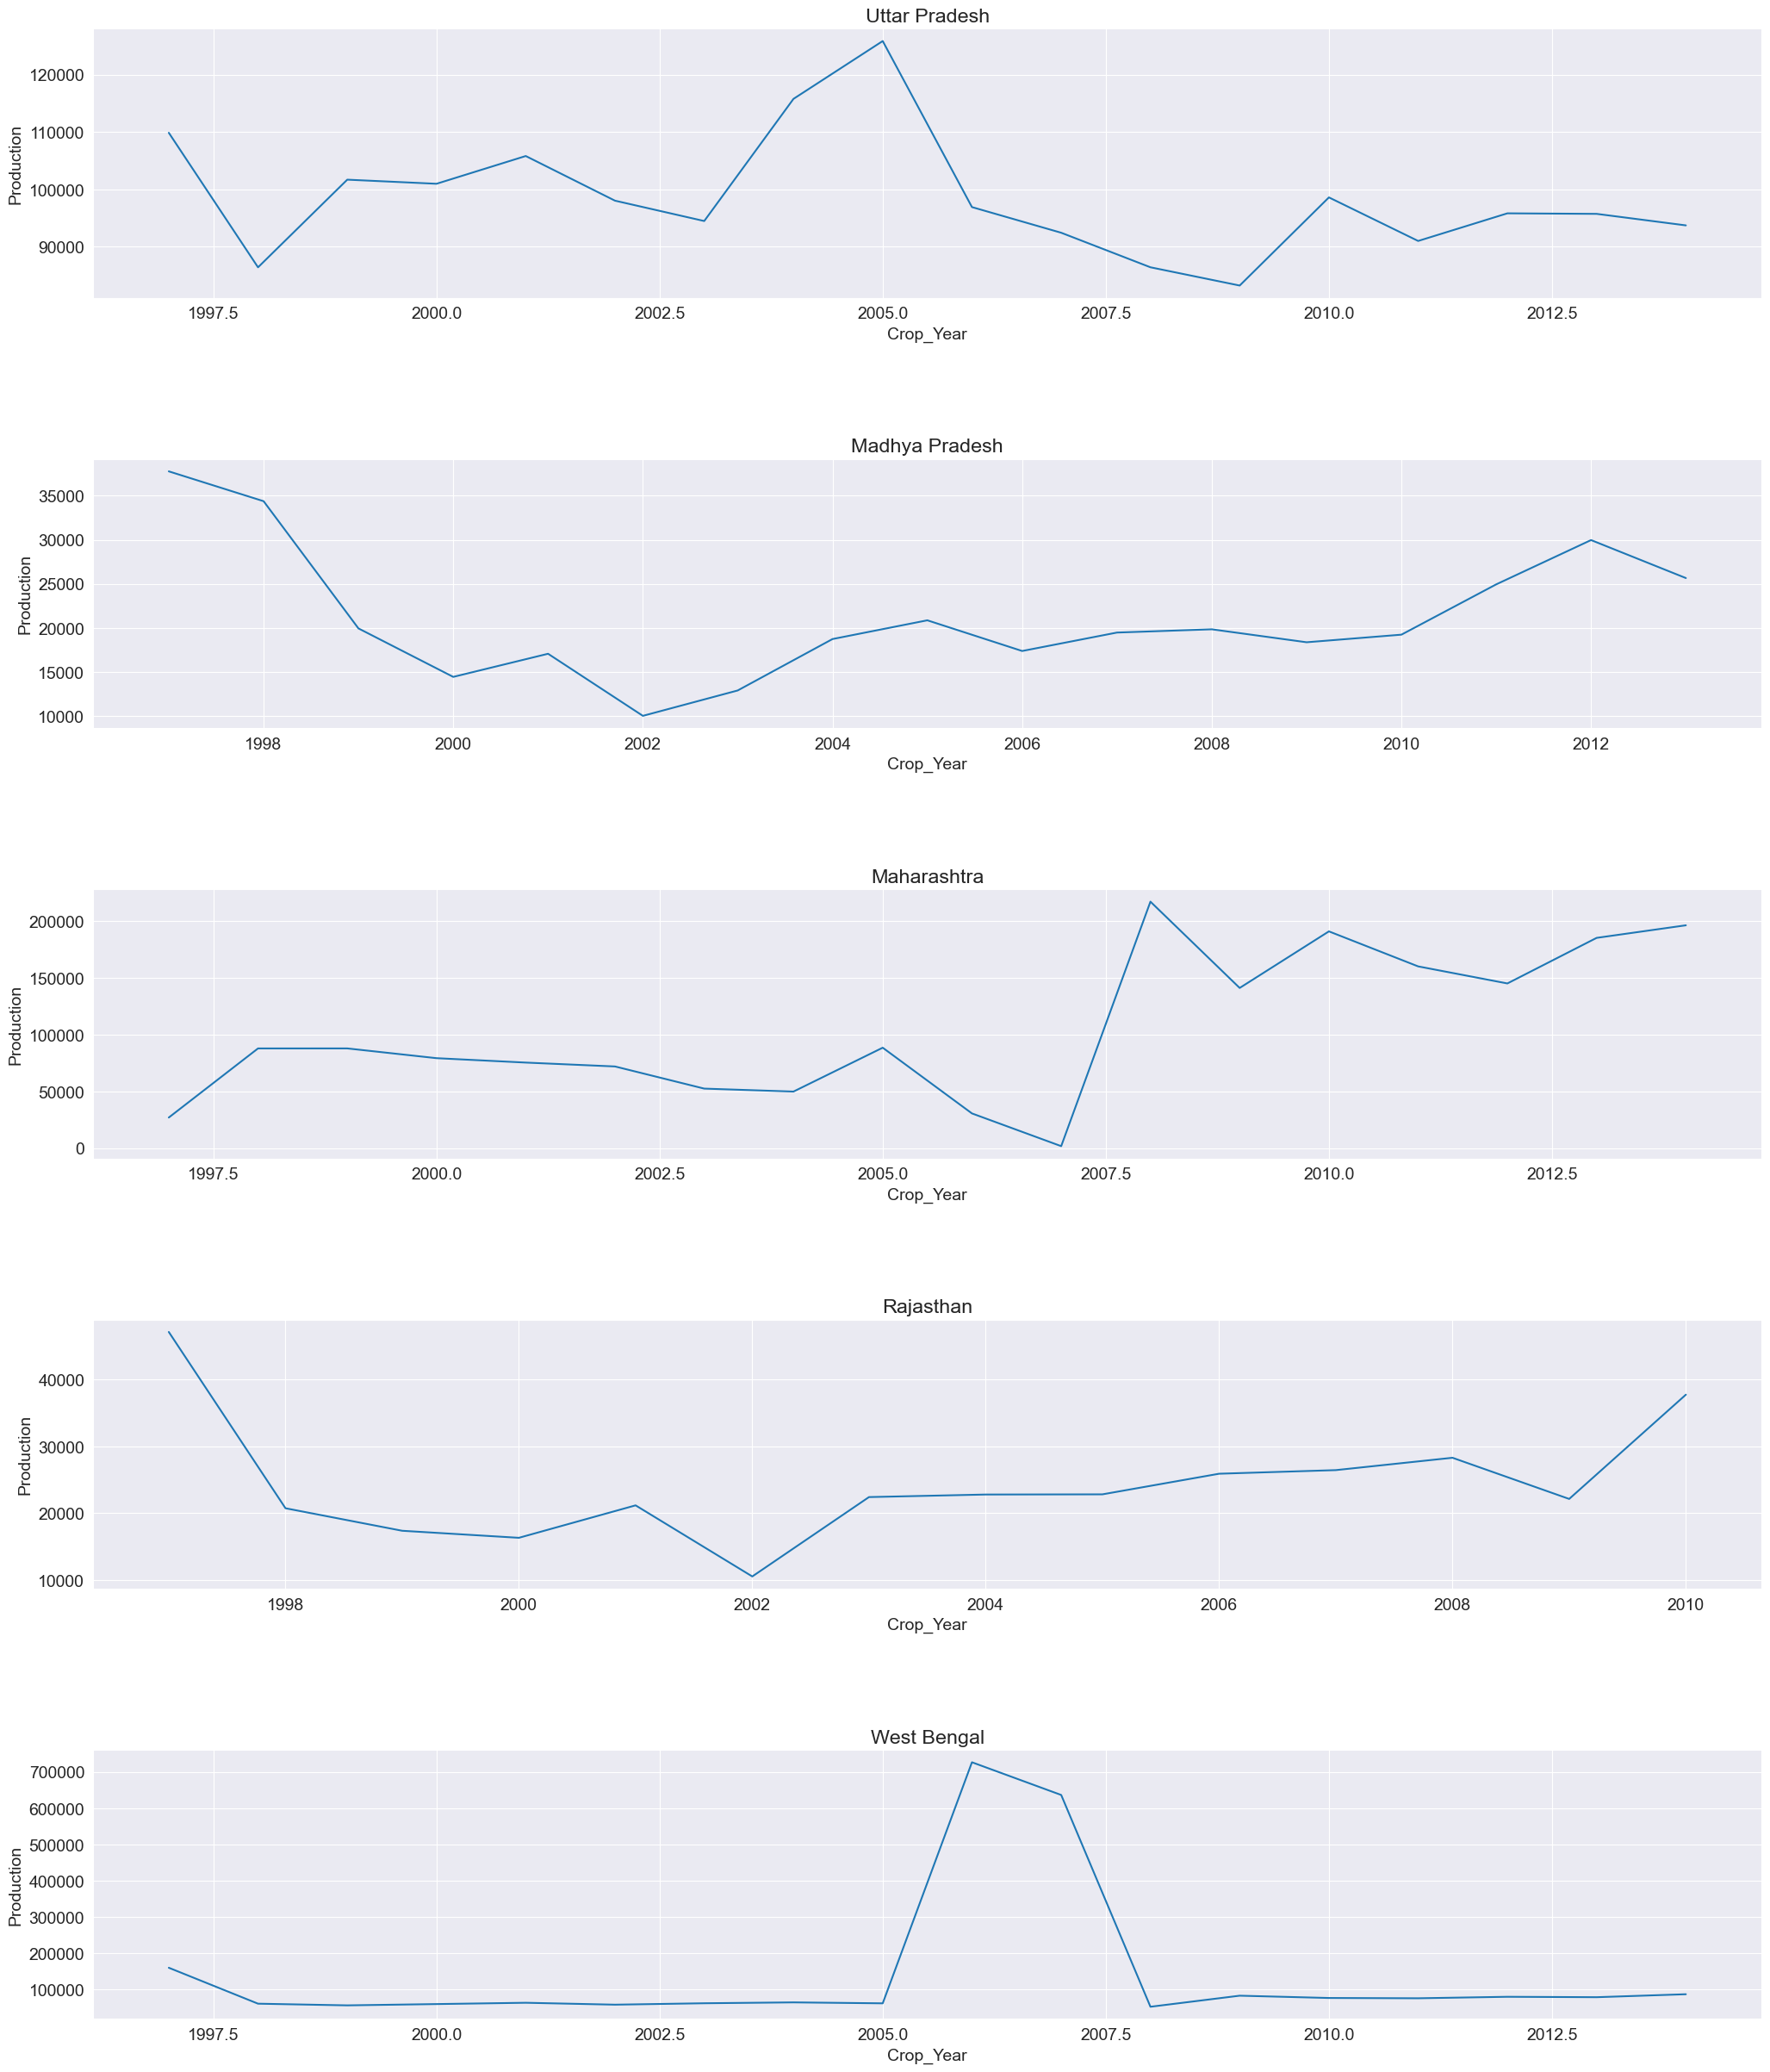

In [102]:
df = data_explore.groupby(by='State_Name')['Area'].sum().reset_index().sort_values(by='Area', ascending=False)
df = df.head(5)

fig, ax = plt.subplots(figsize=(25,30), sharey='col')
count = 1

for state in df.State_Name.unique():
    plt.subplot(len(df.State_Name.unique()),1,count)
    sns.lineplot(x=data_explore[data_explore.State_Name==state]['Crop_Year'], y=data_explore[data_explore.State_Name==state]['Production'], ci=None)
    plt.subplots_adjust(hspace=0.6)
    plt.title(state)
    count+=1;

# **Answers:**

1. Top cultivating states based on the Cultivation area are: Uttar Pradesh(4.33e+08), Madhya Pradesh(3.29e+08) and Maharashtra(3.22e+08)

2. Yearwise Statues of these States:
  
  a. Uttar Pradesh: High Production was seen in 2005 and after that it's been reducing gradually.

  b. Madhya Pradesh:1998 showed a high production and then there was gradual reduction but it picked up and 2012 also showed a peak in Production

  c. Maharashtra:Production went down drastically in 2006 and again the levels went up and hit a  high peak after 2007

  d. Rajasthan: the production hit a all time low in the year 2002 and then picked up by 2010

  e. West Bengal:the production hit a peak around 2006 but it has hit a low after 2007 and never recovered back.

#### **Q4: Discuss the top crops grown in Northern parts of India?**

**Strategy:**

Step 1: Extract North zone data as a subset

Step 2: Explore the top states of North which show high crop production stats

Step 3: Explore the top crops grown in North India

In [103]:
data_explore.Zones.value_counts()

Zones
South Zone      53500
North Zone      49874
East Zone       43261
West Zone       33134
Central Zone    32972
NE Zone         28284
Union Terr       1336
Name: count, dtype: int64

,State_Name,Production
5,Uttar Pradesh,3.234493e+09
4,Punjab,5.863850e+08
1,Haryana,3.812739e+08
6,Uttarakhand,1.321774e+08
2,Himachal Pradesh,1.780517e+07
3,Jammu and Kashmir,1.329102e+07
0,Chandigarh,6.395650e+04


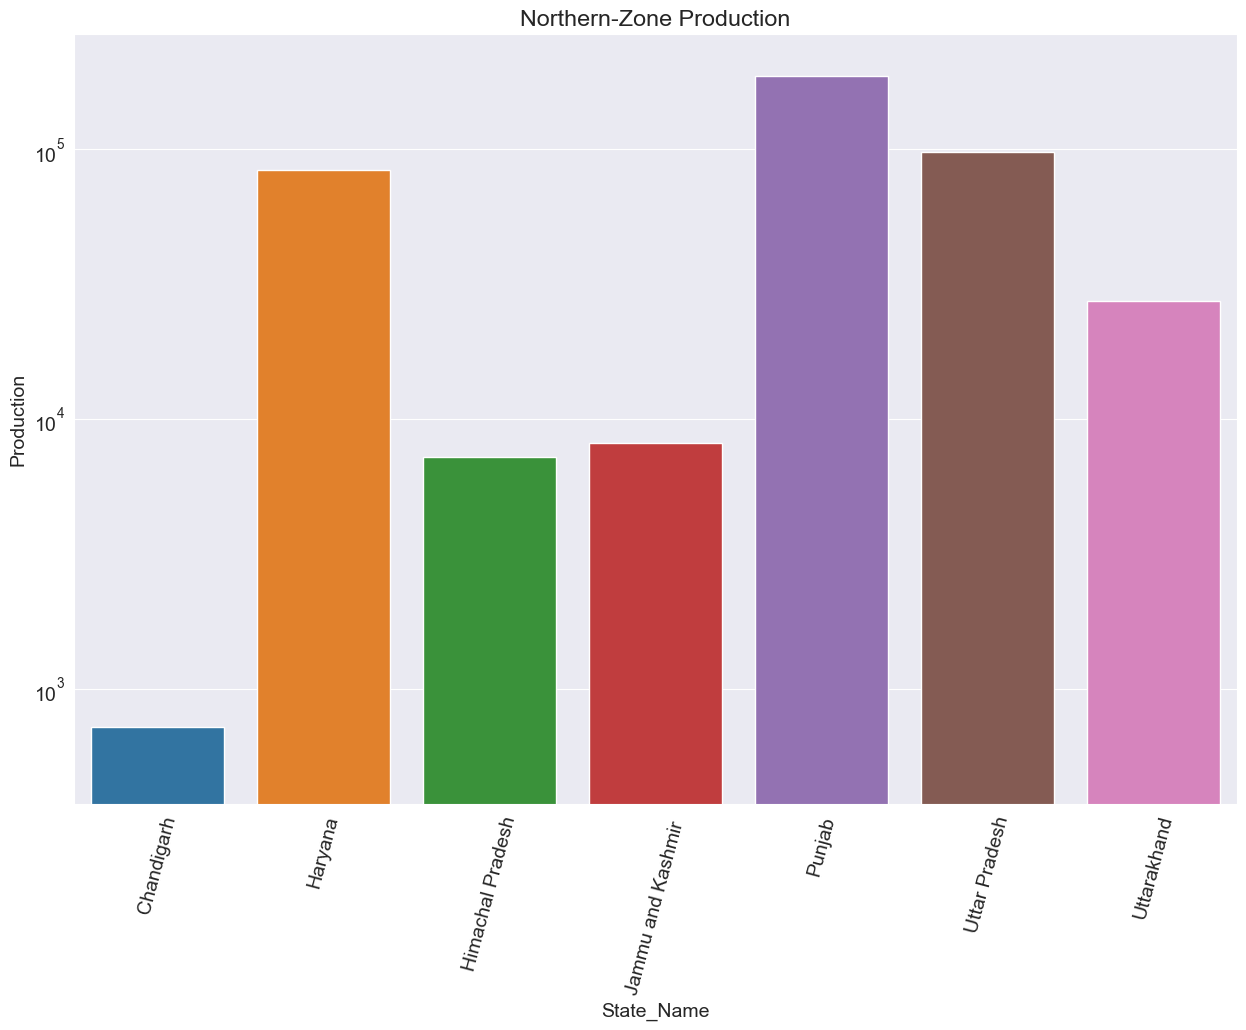

In [104]:
North_zone =  data_explore[(data_explore["Zones"] == 'North Zone')]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=North_zone.State_Name, y=North_zone.Production, errwidth=0)
plt.xticks(rotation=75);
plt.yscale('log')
plt.title('Northern-Zone Production')

North_zone.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

Text(0.5, 1.0, 'North Zone Crops vs Production')

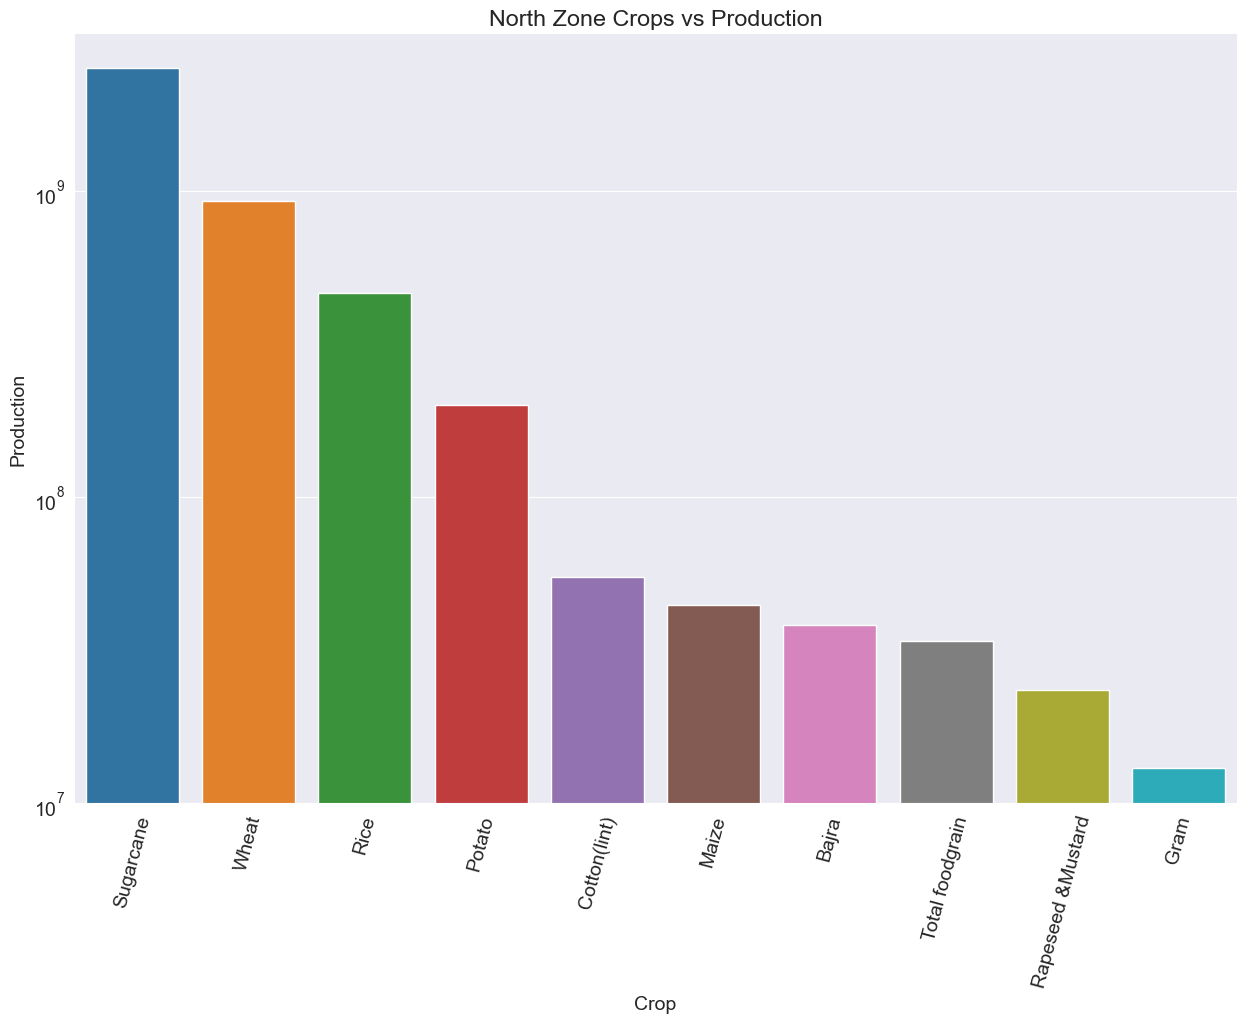

In [105]:
df3 = North_zone.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=df3, x='Crop', y='Production')
plt.xticks(rotation=75)
plt.yscale('log')
plt.title('North Zone Crops vs Production')

**Answers:**

1. Production wise top states of North zone are:
* Punjab(5.86e+08)
* Uttar Pradesh(3.23e+09), and
* Haryana(3.81e+08)

2. Top crops of these states are:
* Sugarcane,
* Wheat and
* Rice



#### **Q5: Top crop of South India is Coconut, Find out that status of Coconut production in India?**

**Strategy:**

Step 1: Draw a subset of data for Coconut Production in India

Step 2: Find the conducive season for coconut production

Step 3: Explore the states involved in coconut production

Step 4: Explore the southern district involved in coconut production

Step 5: Find the cultivation status of coconut yearwise

Step 6: Find the Area under cultivation in South India

In [106]:
coc_df = data_explore[data_explore["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df[:3]

(1958, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,Union Terr,None
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0,Union Terr,None
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.0,67490000.0,Union Terr,None


<Axes: xlabel='Season', ylabel='Production'>

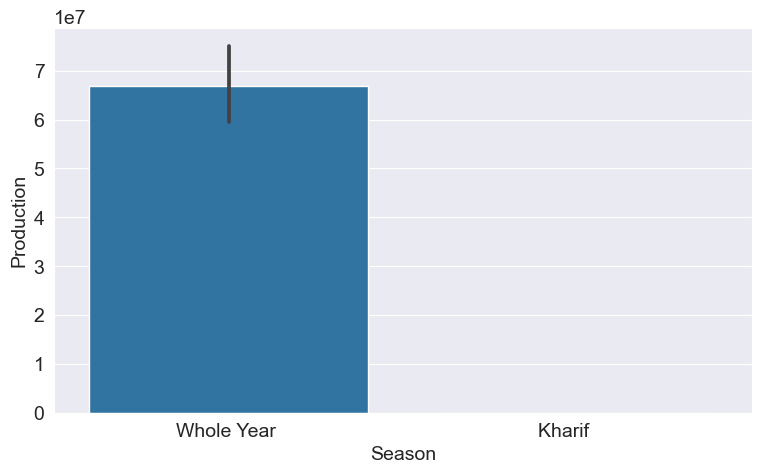

In [107]:
sns.barplot(x="Season", y="Production", data=coc_df)


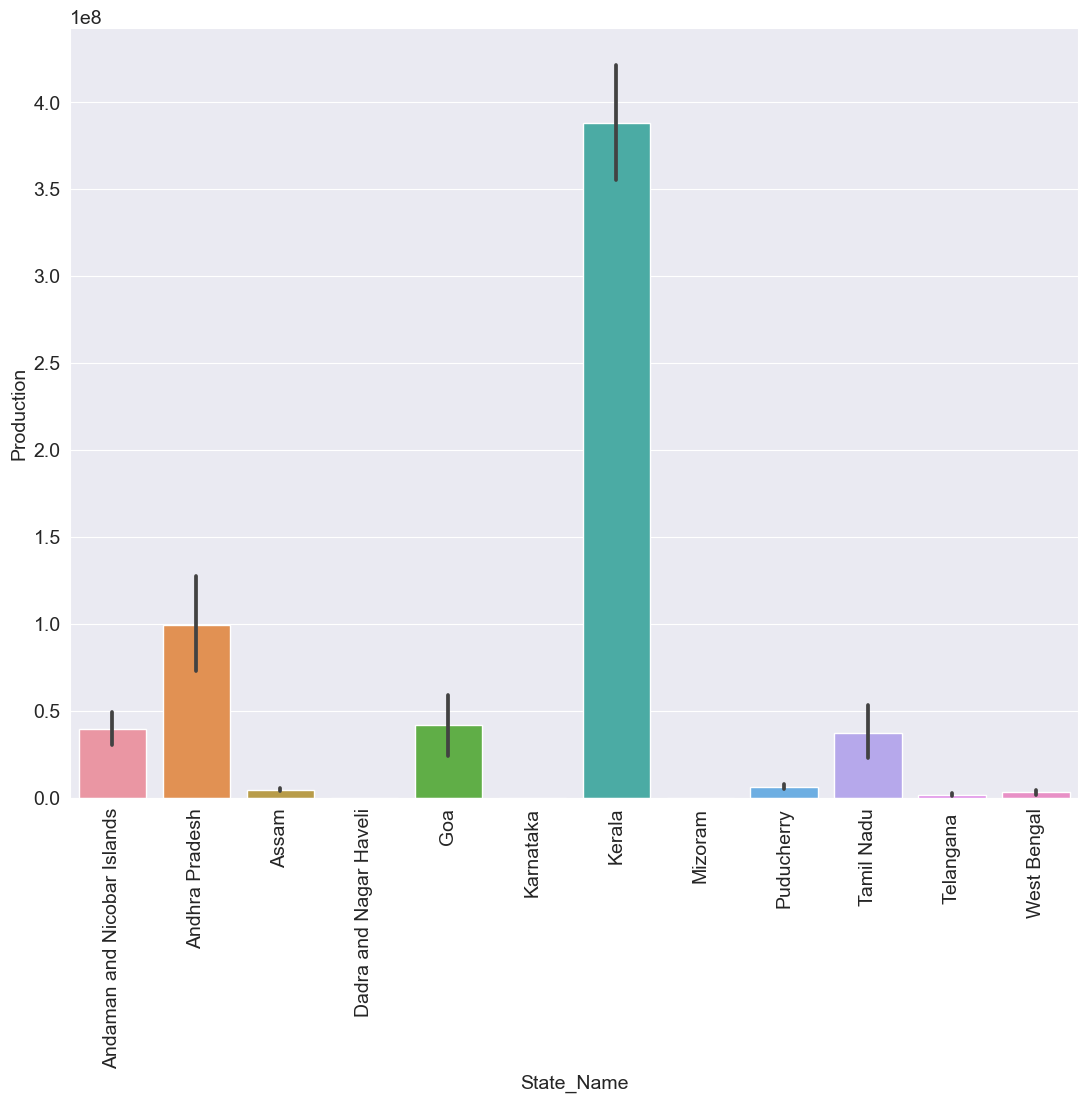

In [108]:
plt.figure(figsize=(13,10))
sns.barplot(x="State_Name", y="Production", data=coc_df)
plt.xticks(rotation=90)
plt.show()

In [111]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]
print(top_coc_pro_dis[:5])

          District_Name    Production  precent_of_pro
77            KOZHIKODE  1.527871e+10       11.754512
86           MALAPPURAM  1.451252e+10       11.165052
129  THIRUVANANTHAPURAM  1.001337e+10        7.703678
131            THRISSUR  9.920739e+09        7.632416
64               KANNUR  9.780310e+09        7.524379


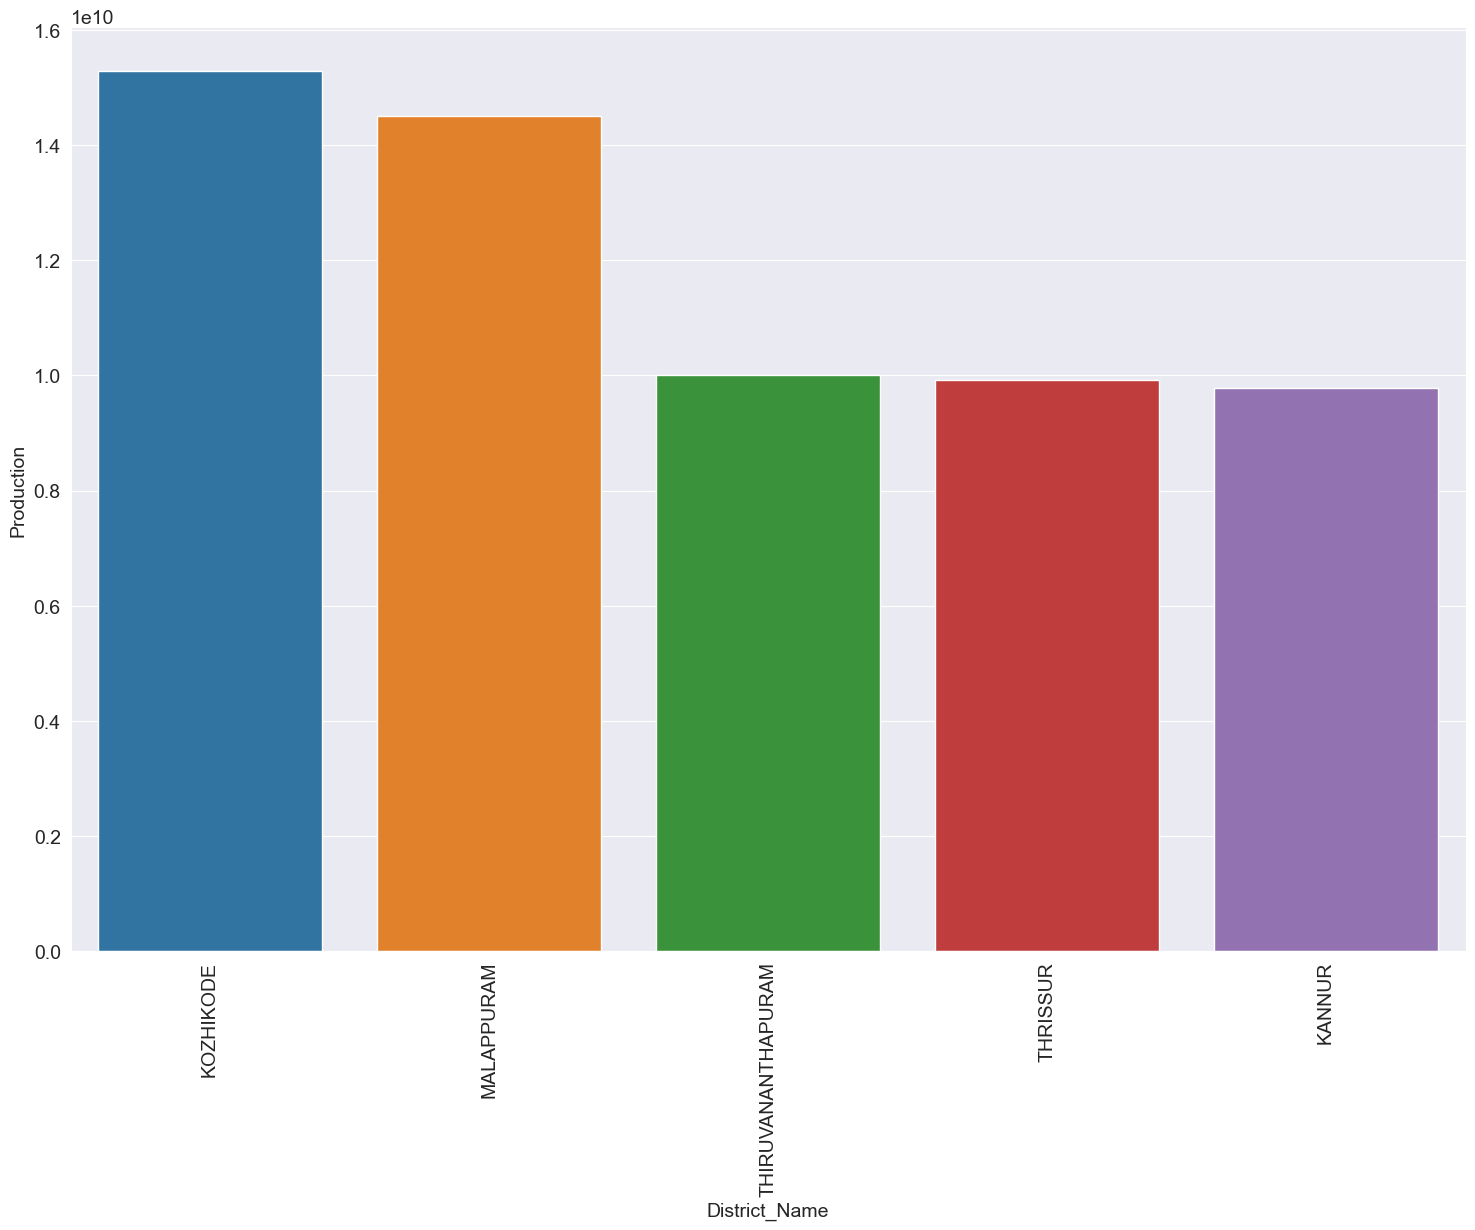

In [112]:
plt.figure(figsize=(18,12))
sns.barplot(x="District_Name", y="Production", data=top_coc_pro_dis[:5])
plt.xticks(rotation=90)
plt.show()

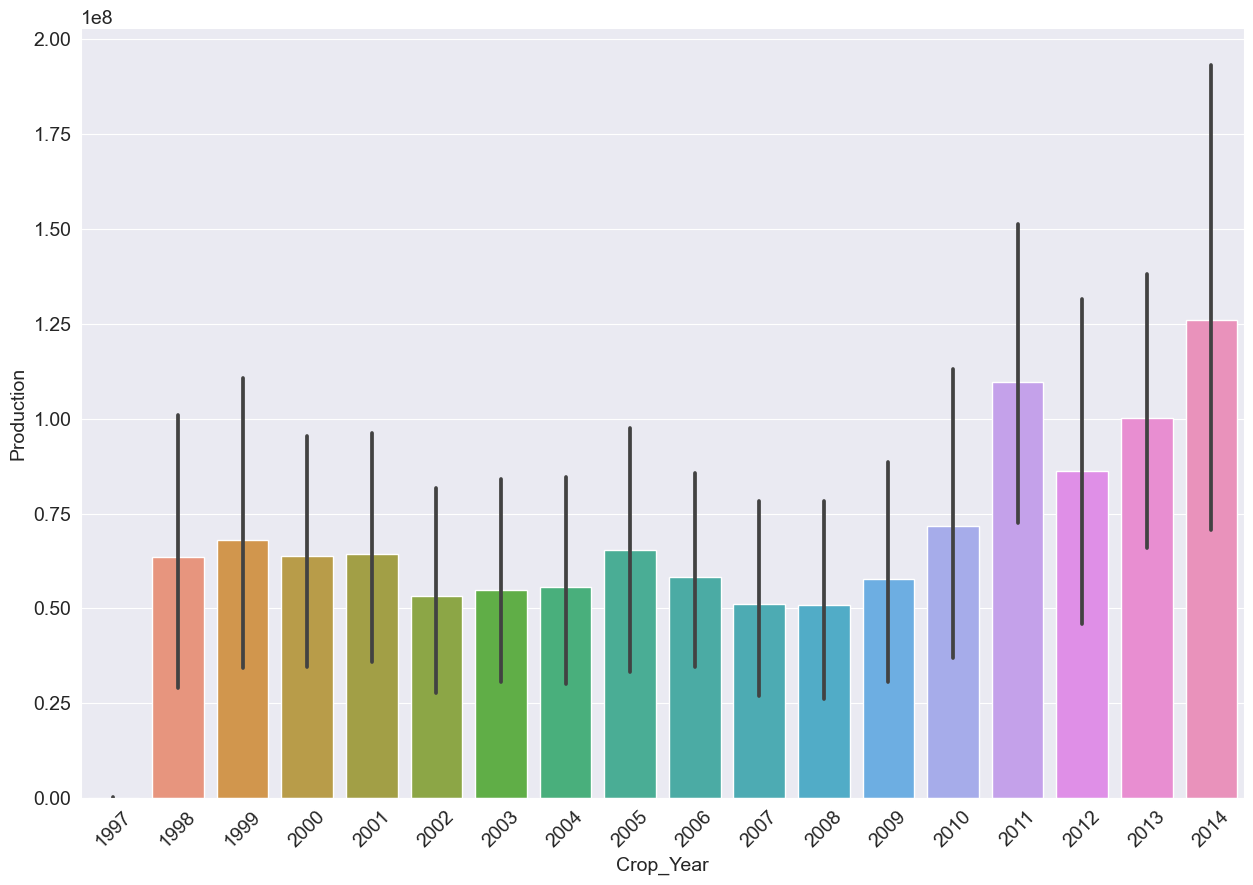

In [113]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year", y="Production", data=coc_df)
plt.xticks(rotation=45)
plt.show()

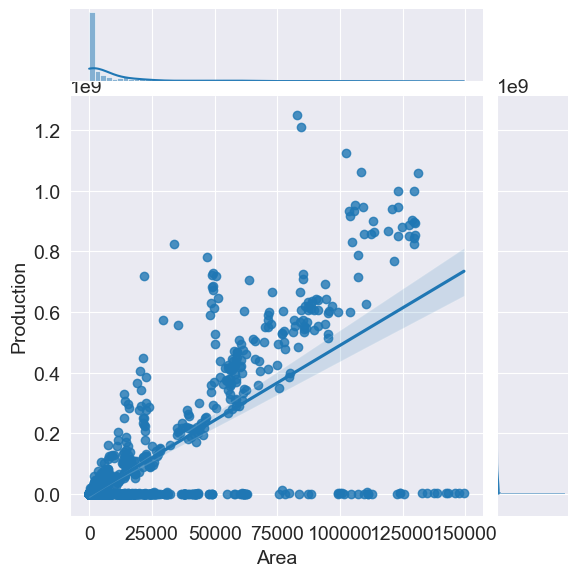

In [114]:
sns.jointplot(x="Area", y="Production", data=coc_df, kind="reg")


**Answers:**

1. Coconut cultivation is yearlong and doesn't get restricted to any particular seasons

2. Top states involved in coconut production are: Kerala, Andhra Pradesh and Tamil Nadu

3. Top districts featuring in coconut production is KOZHIKODE(11.75%), MALAPPURAM(11.16%) and THIRUVANANTHAPURAM(7.7%)

4. Yearwise coconut cultivation is strong and its increasing healthly

5. High coconut cultivation is directly proportional to area under cultivation.



## Inferences and Conclusion

We started with 246091 samples wih 7 columns. Production Variable had 3730 (1.5% of total sample size) missing values which was dropped and working
dataset has 242361 sample size.
Also checked for multicollinearity of variables using heatmap.

**Univarate Analysis:**

> 1. State_Name: 33 Names including Union territories. Top states contributing to dataset are Uttar Pardesh, Madhya Pradesh and Karnataka

> 2. District_Name: 646 districts are represented in the dataset and Top contributors are Tumkur, Belgaum and Bijapur from Karnataka

> 3. Crop_Year: Dataset represents data for 19 years from 1997 to 2015 and maximum data from 2003, 2002 & 2007

> 4. Season: we see six seasons with maximum data from Kharif, Rabi and Whole year

> 5. Crop: we data for 124 different crops with top occurrence from Rice, Maize and Moong(Green Gram)

> 6. Area: Huge margin area used for production from 1 to 8580100 unit area. Distribution is highly right skewed due to lot of outliers.

> 7. Production: Production value ranges from 0 to 1.25e+09 and Distribution is highly right skewed due to lot of outliers.

**Bivarate Analysis:**

> State_Name Vs Production: Top states are Kerala, Andhara Pradesh and Tamil Nadu

**New Variables created:**

> a. Zones: A new variable was created based on 33 State_Name. States were divided bucketed into North Zone, South Zone, East Zone, West Zone, Central Zone, NE Zone and Union Terr.
	Dataset has more data coming from South, North and East zones.

>b. Cat_crop: 124 crops were divided into Cereal, Pulses, oilseeds, Vegetables, spices, Nuts, Commercial, fibres, Beans, Fruits. Dataset shows top categories are Cereal, Pulses and oilseeds.

**Visualization done on:**

> a. Zonal distribution of crops:

* Production wise top zone is South zone with Kerala topping it's high crop production.

> b. Crop wise Production status:

* Production wise top crop type are Coconut, Sugarcane and Rice.

> c. Yearwise Production Status:

* Total Production hit peak in the year 2011 and 2013.

> d. Season wise Production Status:

* Top crop categories which shows high production values are Whole Year(Annual growing plants),Kharif and Rabi crops. It clearly shows these crops heavily dependent on seasonal monssons.

> e. Crop Category wise Production Status:

* Top crop categories are Cereal, Pulses and Oilseeds.

> f. State versus crop Category versus Season Status:

* Top producing state Kerela shows a abundance of whole year seasonal crops and
* Top producing state Uttar Pradesh shows abundance of Kharif, Rabi and Summar crops.

> g. Different Proportion of crop Categories Status:

* Top Crop Categories are Cereal(27.5), Pulses(17.8) and oilseeds(14.7) and these crops contribute towards 60% of total crop production.

**Some Important Questions asked and explored further:**

#*Q1: Which State dominates in crop production with different categories of crops?*#

* Uttar Pradesh is topping in producing more crop categories than any other Indian state and the stats are:
Beans(1112), Cereal(9719),Commercial(1741), Fruits(269), Nuts(958), Pulses(6549), Vegetables(3734), Fibres(724), oilseeds(4028) and spices(2529).

#*Q2: Which Crop is seen in high frequency and when and where is it grown in India?*#

* Rice is grown heavily when we look the frequency of crops in India

* Rice needs Winter for it mature

* Statewise Punjab dominates in rice production

* District wise its BARDHAMAN(2.13%), MEDINIPUR WEST(1.8%) and WEST GODAVARI(1.73%) which contributes to total rice production.

* Yearwise 2014 is the year when production reached the peak production

* Correlation between Area and Production shows high production is directly proportional to Area under cultivation.

#*Q3: Which states ranks high in area wise crop production in India? Substantiate with facts and Figures?*#

* Top cultivating states based on the Cultivation area are: Uttar Pradesh(4.33e+08), Madhya Pradesh(3.29e+08) and Maharashtra(3.22e+08)

* Yearwise Statues of these States:

> a. Uttar Pradesh: High Production was seen in 2005 and after that it's been reducing gradually.

> b. Madhya Pradesh:1998 showed a high production and then there was gradual reduction but it picked up and 2012 also showed a peak in Production

> c. Maharashtra:Production went down drastically in 2006 and again the levels went up and hit a high peak after 2007

> d. Rajasthan: the production hit a all time low in the year 2002 and then picked up by 2010

> e. West Bengal:the production hit a peak around 2006 but it has hit a low after 2007 and never recovered back.

#*Q4: Discuss the top crops grown in Northern parts of India?*#

* Production wise top states of North zone are:
> Punjab(5.86e+08),
> Uttar Pradesh(3.23e+09), and
> Haryana(3.81e+08)
* Top crops of these states are:
> Sugarcane,
> Wheat and
> Rice

#* Q5: Top crop of South India is Coconut, Find out that status of Coconut production in India?*#

* Coconut cultivation is yearlong and doesn't get restricted to any particular seasons

* Top states involved in coconut production are: Kerala, Andhra Pradesh and Tamil Nadu

* Top districts featuring in coconut production is KOZHIKODE(11.75%), MALAPPURAM(11.16%) and THIRUVANANTHAPURAM(7.7%)

* Yearwise coconut cultivation is strong and its increasing healthly

* High coconut cultivation is directly proportional to area under cultivation.



##References and Future Work
Future Work:

This analysis is just the beginning, and with nineteen years of crop production data, there are numerous possibilities for further exploration:

1. Imputation for Missing Production Data: Instead of deleting the 3730 data points with missing production values, we could consider imputation based on factors like cultivation area and state.

2. Zone-wise Cultivation Analysis: We can delve into the cultivation status by different zones and use regression to predict future production trends.

3. Crop Category Analysis: Explore the cultivation status of different crop categories over the years. Investigate trends where production has increased (positive scenario) or decreased (negative scenario) and analyze the potential causes behind these trends.

4. Comparative Analysis: Ask important questions such as why Kerala, despite having lower area coverage compared to other southern states, maintains higher production levels. Investigate the factors contributing to this phenomenon.